## PSA:

In [1]:
from functions import persist_html_content_dynamic
url = 'https://www.psacard.com/priceguide/non-sports-tcg-card-values/7'
persist_html_content_dynamic(url, 'sets_list_page.html')


<html lang="en" class=" montserrat-loaded"><head prefix="og: http://ogp.me/ns#"><style><!----> <!--?lit$5296384712$-->.osano-cm-window{font-smooth:always;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothingz:auto;--fade-transition-time:700ms;--slide-transition-time:400ms;display:block;font-family:Helvetica,Arial,Hiragino Sans GB,STXihei,Microsoft YaHei,WenQuanYi Micro Hei,Hind,MS Gothic,Apple SD Gothic Neo,NanumBarunGothic,sans-serif;font-size:16px;left:0;line-height:1;position:absolute;top:0;width:100%;z-index:2147483638}.osano-cm-window--context_amp{height:100%}.osano-visually-hidden{height:1px;left:-10000px;margin:-1px;opacity:0;overflow:hidden;position:absolute;width:1px}.osano-cm-button{border-radius:.25em;border-style:solid;border-width:thin;cursor:pointer;flex:1 1 auto;font-size:1em;font-weight:700;line-height:1;margin:.125em;min-width:6em;padding:.5em .75em;transition-duration:.2s;transition-property:background-color;transition-timing-function:ease-out}.osano-cm-button--t

In [1]:
from functions import extract_sets_links

extract_sets_links('sets_list_page.html', 'sets_links.json')

Pokémon links extracted and saved to sets_links.json.


In [1]:
from functions import extract_pop_apr_links

prefix = 'https://www.psacard.com'
input_html_file = 'consolidated.html'  # input HTML file name
output_pop_json_file = 'pop_links.json'  #  output JSON file name for POP links
output_apr_json_file = 'apr_links.json'  # output JSON file name for APR links
extract_pop_apr_links(input_html_file, output_pop_json_file, output_apr_json_file, prefix)

## TCG PLAYER:

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time

def persist_html_content_dynamic2(url, file_name='page.html', wait_time=30):
    """
    Fetches the HTML content of a web page using Selenium after waiting for a specific table to load,
    and persists it as a single HTML document.

    Args:
        url (str): URL of the site.
        file_name (str): The name of the output HTML file. Default is 'page.html'.
        wait_time (int): Maximum time in seconds to wait for page elements. Default is 20 seconds.

    Returns:
        None
    """
    # Set up Chrome options
    chrome_options = Options()
    #chrome_options.add_argument("--headless")  # Run in headless mode
    #chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--no-sandbox")

    # Set up the Selenium WebDriver
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    
    try:
        # Open the website
        driver.get(url)
        
        # Print part of the page source for debugging
        print(driver.page_source[:1000])  # Print the first 1000 characters of the page source
        
        # Wait for the table to be loaded
        WebDriverWait(driver, wait_time).until(
            EC.presence_of_element_located((By.ID, 'app'))
        )

        # Give some time for all JavaScript to execute (optional, you can adjust the sleep time as needed)
        time.sleep(5)

        # Get the page HTML
        page_html = driver.page_source

        # Save the HTML to a file
        with open(file_name, 'w', encoding='utf-8') as file:
            file.write(page_html)

        print(f"HTML content persisted to {file_name}.")
    
    finally:
        # Close the WebDriver
        driver.quit()

# Usage example:
url = 'https://www.tcgplayer.com/categories/trading-and-collectible-card-games/pokemon/price-guides/sv06-twilight-masquerade'
persist_html_content_dynamic2(url, 'tcgplayer.html')

<html lang="en"><head><meta charset="utf-8"><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width,initial-scale=1,viewport-fit=cover"><meta name="version-build" content="2487"><meta name="version-hash" content="f5595cb8b2e96e0e5e1e741be85536a50c6de083"><meta name="version-name" content="origin/hotfix-cm-1580"><meta name="facebook-domain-verification" content="ujhbh9jn9ccwotzunt4vehh5l26w5i"><script>;window.NREUM||(NREUM={});NREUM.init={distributed_tracing:{enabled:true},privacy:{cookies_enabled:true},ajax:{deny_list:["bam-cell.nr-data.net"]}};

      ;NREUM.loader_config={accountID:"2099792",trustKey:"2099792",agentID:"153290625",licenseKey:"a7f40de1df",applicationID:"153290625"};
      ;NREUM.info={beacon:"bam-cell.nr-data.net",errorBeacon:"bam-cell.nr-data.net",licenseKey:"a7f40de1df",applicationID:"153290625",sa:1};

;/*! For license information please see nr-loader-sp

In [1]:
from functions import scrape_tcgplayer

scrape_tcgplayer('https://www.tcgplayer.com/categories/trading-and-collectible-card-games/pokemon', 'tcg_player_all_sets.html')


## now we have a consolidated html of the sets... i.e. html of the set list -> from that we get the links to the sets -> links to cards -> prices

In [1]:
#get links to sets - and get the prices directly from that:

from functions import extract_links_from_html_tcg

extract_links_from_html_tcg('tcg_player_all_sets.html', 'links_tcgp_sets.json')



Extracted 134 links and saved to links_tcgp_sets.json


In [7]:
'''
import json
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def download_html_with_preferences(json_file):
    # Load URLs from JSON file
    with open(json_file, 'r') as file:
        urls = json.load(file)

    # Create the output folder if it doesn't exist
    output_folder = "tcg_price_guide_htmls"
    os.makedirs(output_folder, exist_ok=True)

    # Initialize WebDriver (Chrome in this case)
    driver = webdriver.Chrome()

    for url in urls:
        try:
            # Navigate to the URL
            driver.get(url)

            # Wait until the "Preferences" button is clickable and click it
            preferences_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, ".preferences"))
            )
            preferences_button.click()

            # Wait for the preferences drawer to appear
            WebDriverWait(driver, 10).until(
                EC.visibility_of_element_located((By.CSS_SELECTOR, ".tcg-drawer__sheet"))
            )

            # Find and tick the "Expand Printings" checkbox using the label text
            expand_printings_checkbox = driver.find_element(By.XPATH, "//label[contains(., 'Expand Printings')]/span/input")
            if not expand_printings_checkbox.is_selected():
                expand_printings_checkbox.click()

            # Optionally, click the "Close" button to close the drawer
            close_button = driver.find_element(By.CSS_SELECTOR, ".tcg-drawer__header button[aria-label='Close drawer']")
            close_button.click()

            # Wait for the table to reload with the new settings
            time.sleep(5)  # Adjust sleep as necessary

            # Get the page source (HTML)
            html_content = driver.page_source

            # Define the output filename
            output_filename = f"{output_folder}/{url.split('//')[-1].replace('/', '_')}.html"

            # Save the HTML to a file in the designated folder
            with open(output_filename, 'w', encoding='utf-8') as html_file:
                html_file.write(html_content)

            print(f"Downloaded HTML from {url} and saved as {output_filename}")

        except Exception as e:
            print(f"Failed to process {url}: {str(e)}")

    # Close the WebDriver
    driver.quit()

# Example usage:
download_html_with_preferences('links_tcgp_sets.json')

'''


##not yet done... needs to tick it... still does not tick it and does not download it..


#i see, it seems that it goes through each of the links and clicks the preferences button, however it seems not being able to tick the preference I need. so I am sending you the part that appears after clicking the preferences button and which I want to tick: <div data-v-5f91b5f3="" class="tcg-input-checkbox"><label for="tcg-input-5739" class="tcg-input-checkbox__label"><span class="tcg-input-checkbox__input-container"><input id="tcg-input-5739" type="checkbox" class="tcg-input-checkbox__input"><span class="tcg-input-checkbox__input-toggle"><!--v-if--></span></span><span class="tcg-input-checkbox__label-text">Expand Printings</span></label></div>

Failed to process https://www.tcgplayer.com/categories/trading-and-collectible-card-games/pokemon/price-guides/battle-academy-2024: Message: element click intercepted: Element <input id="tcg-input-139" type="checkbox" class="tcg-input-checkbox__input"> is not clickable at point (576, 290). Other element would receive the click: <span class="tcg-input-checkbox__input-toggle">...</span>
  (Session info: chrome=127.0.6533.120)
Stacktrace:
	GetHandleVerifier [0x00007FF67CA99642+30946]
	(No symbol) [0x00007FF67CA4E3D9]
	(No symbol) [0x00007FF67C946FDA]
	(No symbol) [0x00007FF67C99FEEE]
	(No symbol) [0x00007FF67C99D962]
	(No symbol) [0x00007FF67C99AE7B]
	(No symbol) [0x00007FF67C99A095]
	(No symbol) [0x00007FF67C98C271]
	(No symbol) [0x00007FF67C9BCA6A]
	(No symbol) [0x00007FF67C98BBB6]
	(No symbol) [0x00007FF67C9BCC80]
	(No symbol) [0x00007FF67C9DB041]
	(No symbol) [0x00007FF67C9BC813]
	(No symbol) [0x00007FF67C98A6E5]
	(No symbol) [0x00007FF67C98B021]
	GetHandleVerifier [0x00007FF67CBCF84D

In [4]:
'''
import json
import os
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

def download_html_after_table_load(json_file, output_folder="tcg_price_guide_htmls", timeout=20):
    try:
        # Load URLs from JSON file
        with open(json_file, 'r') as file:
            urls = json.load(file)

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        # Set up Chrome options
        chrome_options = Options()
        chrome_options.add_argument("--no-sandbox")
        #chrome_options.add_argument("--headless")  # Optional: run headless mode
        #chrome_options.add_argument("--disable-dev-shm-usage")

        # Set up the Selenium WebDriver
        service = Service(ChromeDriverManager().install())
        driver = webdriver.Chrome(service=service, options=chrome_options)

        for url in urls:
            try:
                # Navigate to the URL
                driver.get(url)

                # Wait until the table is fully loaded (adjust selector as needed)
                WebDriverWait(driver, timeout).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, ".tcg-table__table"))
                )

                # Get the page source (HTML)
                html_content = driver.page_source

                # Define the output filename
                output_filename = f"{output_folder}/{url.split('//')[-1].replace('/', '_')}.html"

                # Save the HTML to a file in the designated folder
                with open(output_filename, 'w', encoding='utf-8') as html_file:
                    html_file.write(html_content)

                print(f"Downloaded HTML from {url} and saved as {output_filename}")

            except (TimeoutException, NoSuchElementException) as e:
                print(f"Failed to process {url} due to {type(e).__name__}: {str(e)}")

            except Exception as e:
                print(f"An unexpected error occurred while processing {url}: {str(e)}")

    except json.JSONDecodeError as e:
        print(f"Failed to load URLs from {json_file}: {str(e)}")

    finally:
        # Close the WebDriver if initialized
        try:
            driver.quit()
        except NameError:
            pass

# Example usage:
download_html_after_table_load('links_tcgp_sets.json')

'''

OSError: [WinError 193] %1 není platná aplikace typu Win32

## PSA cont:

In [3]:
import os
from functions import process_folders
base_path = os.getcwd() # Replace with the path to the directory containing Set_1, Set_2, ...
process_folders(base_path)

Extracted links from c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_1\index.html and saved to c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_1\links.json
Extracted links from c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_10\index.html and saved to c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_10\links.json
Extracted links from c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_100\index.html and saved to c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_100\links.json
Extracted links from c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_101\index.html and saved to c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_101\links.json
Extracted links from c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_102\index.html and saved to c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_102\links.json
Extracted links from c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_103\index.html and saved to c:\Users\janhr\Repos\Pokemon_Market_Efficiency\Set_103\links.json
Extracted 

## Clean the folders function:

In [3]:
import os
import glob

def clean_sets_directory(base_path):
    # Loop through each set folder
    for i in range(1, 152):
        folder_name = f"Set_{i}"
        folder_path = os.path.join(base_path, folder_name)
        
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            # Get all files in the folder
            files_in_folder = glob.glob(os.path.join(folder_path, '*'))
            
            for file_path in files_in_folder:
                # Extract the file name
                file_name = os.path.basename(file_path)
                
                # Delete the file if it is not 'links.json' or 'index.html'
                if file_name not in ['links.json', 'index.html']:
                    try:
                        if os.path.isfile(file_path):
                            os.remove(file_path)
                            print(f"Deleted file: {file_path}")
                        elif os.path.isdir(file_path):
                            os.rmdir(file_path)  # Only removes empty directories
                            print(f"Deleted empty directory: {file_path}")
                    except Exception as e:
                        print(f"Error deleting {file_path}: {e}")
        else:
            print(f"Folder {folder_name} does not exist in {base_path}.")

# Usage
base_path = "C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final"
clean_sets_directory(base_path)


Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Abra (BLUE BACK).html
Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Aerodactyl (BLUE BACK).html
Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Alakazam (BLUE BACK).html
Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Arbok (BLUE BACK).html
Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Arcanine (BLUE BACK).html
Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Bulbasaur (BLUE BACK).html
Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Caterpie (BLUE BACK).html
Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Chansey (BLUE BACK).html
Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Charizard (BLUE BACK).html
Deleted file: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\Charmander (BLUE BACK).html
Deleted file

In [12]:
# Extract the information from TCG set - not working well...


import json
from bs4 import BeautifulSoup

def extract_all_cards_info(html_file_path, output_json_path):
    """
    Extracts information of all cards from the provided HTML and writes it to a JSON file.

    Args:
    html_file_path (str): The path to the HTML file.
    output_json_path (str): The path to the output JSON file.

    The extracted information includes:
        - name: The name of the card.
        - image_url: URL to the card image.
        - printing: The card's printing type (e.g., Reverse Holofoil).
        - condition: The condition of the card (e.g., Near Mint).
        - rarity: The rarity of the card (e.g., Common).
        - set_number: The card's set number.
        - price: The price of the card.
        - quantity: The available quantity for purchase.
    """
    # Open the HTML file and read its content
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html = file.read()

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    card_rows = soup.find_all('tr', class_=["is-even", "is-odd"])
    all_cards_info = []

    for row in card_rows:
        card_info = {}

        # Extract card name
        name_tag = row.select_one('.pdp-url')
        card_info['name'] = name_tag.text.strip() if name_tag else None

        # Extract image URL
        image_tag = row.select_one('.card-image-link img')
        card_info['image_url'] = image_tag['src'] if image_tag else None

        # Extract printing type
        # Extract printing type
        printing_tag = row.select_one('.tcg-input .tcg-input-select__trigger span')
        card_info['printing'] = printing_tag.text.strip() if printing_tag else None

        # Extract condition
        condition_tag = row.select_one('.tcg-table-body__cell--condition')
        card_info['condition'] = condition_tag.text.strip() if condition_tag else None

        # Extract rarity
        rarity_tag = row.find('td', class_='tcg-table-body__cell--rarity')
        card_info['rarity'] = rarity_tag.text.strip() if rarity_tag else None

        # Extract set number
        set_number_tag = row.find('td', class_='tcg-table-body__cell--set-number')
        card_info['set_number'] = set_number_tag.text.strip() if set_number_tag else None

        # Extract price
        price_tag = row.select_one('.tcg-table-body__cell--align-right')
        card_info['price'] = price_tag.text.strip() if price_tag else None

        # Extract quantity
        quantity_tag = row.select_one('.tcg-table-body__cell--quantity span')
        card_info['quantity'] = quantity_tag.text.strip() if quantity_tag else None

        all_cards_info.append(card_info)

    # Write the extracted card information to a JSON file
    with open(output_json_path, 'w', encoding='utf-8') as json_file:
        json.dump(all_cards_info, json_file, indent=4, ensure_ascii=False)

    print(f"Extracted data has been written to {output_json_path}")

# Example usage
html_file_path = "tcg_price_guide_htmls/aquapolis.html"  # Replace with your HTML file path
output_json_path = "tcg_price_guide_htmls/cards_info_1st_attempt.json"  # Specify where to save the JSON file
extract_all_cards_info(html_file_path, output_json_path)


Extracted data has been written to tcg_price_guide_htmls/cards_info_1st_attempt.json


In [1]:
#PSA extract - just a single card

import json
from bs4 import BeautifulSoup

def extract_auction_data(html_content, output_file="auction_data.json"):
    """
    Extracts auction data such as image link, date, price, grade, LOT#, Auction House, 
    auction/seller, type, and cert number from a given HTML snippet and saves it to a JSON file.
    
    Args:
        html_content (str): The HTML content containing auction data.
        output_file (str): The file path where the extracted data will be saved in JSON format.
        
    Returns:
        None: The function saves the extracted data to the specified JSON file.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    table_rows = soup.select('tbody tr')
    
    data_list = []

    for row in table_rows:
        image_tag = row.find('a', href=True)
        image_url = image_tag['href'] if image_tag else None
        date = row.find_all('td')[2].text
        price = row.find_all('td')[3].text
        grade = row.find_all('td')[4].text
        lot_number = row.find_all('td')[5].text
        auction_house = row.find_all('td')[6].text
        auction_seller = row.find_all('td')[7].text
        auction_type = row.find_all('td')[8].text if len(row.find_all('td')) > 8 else None
        cert_number = row.find_all('td')[9].text if len(row.find_all('td')) > 9 else None

        auction_data = {
            "image_url": image_url,
            "date": date,
            "price": price,
            "grade": grade,
            "lot_number": lot_number,
            "auction_house": auction_house,
            "auction_seller": auction_seller,
            "auction_type": auction_type,
            "cert_number": cert_number
        }

        data_list.append(auction_data)

    with open(output_file, 'w') as json_file:
        json.dump(data_list, json_file, indent=4)

    print(f"Data successfully extracted and saved to {output_file}")

# Example usage
with open('Set_1/Abra (BLUE BACK).html', 'r') as file:
    html_content = file.read()
extract_auction_data(html_content, 'Abra_Blue_Back_Set_1.json')


Data successfully extracted and saved to Abra_Blue_Back_Set_1.json


In [3]:
#PSA Extract for all the cards

import os
import json
from bs4 import BeautifulSoup

def extract_auction_data(html_content, output_file):
    """
    Extracts auction data such as image link, date, price, grade, LOT#, Auction House, 
    auction/seller, type, and cert number from a given HTML snippet and saves it to a JSON file.
    
    Args:
        html_content (str): The HTML content containing auction data.
        output_file (str): The file path where the extracted data will be saved in JSON format.
        
    Returns:
        None: The function saves the extracted data to the specified JSON file.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    table_rows = soup.select('tbody tr')
    
    data_list = []

    for row in table_rows:
        image_tag = row.find('a', href=True)
        image_url = image_tag['href'] if image_tag else None
        date = row.find_all('td')[2].text
        price = row.find_all('td')[3].text
        grade = row.find_all('td')[4].text
        lot_number = row.find_all('td')[5].text
        auction_house = row.find_all('td')[6].text
        auction_seller = row.find_all('td')[7].text
        auction_type = row.find_all('td')[8].text if len(row.find_all('td')) > 8 else None
        cert_number = row.find_all('td')[9].text if len(row.find_all('td')) > 9 else None

        auction_data = {
            "image_url": image_url,
            "date": date,
            "price": price,
            "grade": grade,
            "lot_number": lot_number,
            "auction_house": auction_house,
            "auction_seller": auction_seller,
            "auction_type": auction_type,
            "cert_number": cert_number
        }

        data_list.append(auction_data)

    with open(output_file, 'w') as json_file:
        json.dump(data_list, json_file, indent=4)

    print(f"Data successfully extracted and saved to {output_file}")

def process_folders(base_dir):
    """
    Processes all folders named Set_1, Set_2, ..., Set_151 in the base directory, 
    extracts auction data from HTML files (excluding index.html and JSON files), 
    and saves the extracted data in JSON format in a new folder 'cards_json_data'.
    
    Args:
        base_dir (str): The path to the directory containing the Set folders.
        
    Returns:
        None
    """
    # Iterate over all folders named Set_X in the base directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        # Ensure it's a directory starting with 'Set_'
        if os.path.isdir(folder_path) and folder_name.startswith('Set_'):
            json_output_folder = os.path.join(folder_path, 'cards_json_data')
            
            # Create the 'cards_json_data' folder if it doesn't exist
            if not os.path.exists(json_output_folder):
                os.makedirs(json_output_folder)
            
            # Iterate over all files in the set folder
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)

                # Skip index.html and JSON files
                if file_name == 'index.html' or file_name.endswith('.json'):
                    continue

                # Process only HTML files
                if file_name.endswith('.html'):
                    with open(file_path, 'r', encoding='utf-8') as html_file:
                        html_content = html_file.read()

                    # Generate the output JSON file path
                    json_file_name = os.path.splitext(file_name)[0] + '.json'
                    output_file_path = os.path.join(json_output_folder, json_file_name)

                    # Extract auction data and save it in the JSON file
                    extract_auction_data(html_content, output_file_path)

# Example usage
process_folders('C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final')


Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data\Abra #63 (BLUE BACK).json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data\Abra #63 (GREEN BACK).json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data\Abra (BLUE BACK).json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data\Aerodactyl #142 (BLUE BACK).json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data\Aerodactyl #142 (GREEN BACK).json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data\Aerodactyl (BLUE BACK).json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data\Alakazam #65 (BLUE

KeyboardInterrupt: 

In [5]:
## PSA extract the data from the htmls -- ALLOWS STARTING FROM A GIVEN SET!!

import os
import json
from bs4 import BeautifulSoup

def extract_auction_data(html_content, output_file):
    """
    Extracts auction data such as image link, date, price, grade, LOT#, Auction House, 
    auction/seller, type, and cert number from a given HTML snippet and saves it to a JSON file.
    
    Args:
        html_content (str): The HTML content containing auction data.
        output_file (str): The file path where the extracted data will be saved in JSON format.
        
    Returns:
        None: The function saves the extracted data to the specified JSON file.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    table_rows = soup.select('tbody tr')
    
    data_list = []

    for row in table_rows:
        image_tag = row.find('a', href=True)
        image_url = image_tag['href'] if image_tag else None
        date = row.find_all('td')[2].text
        price = row.find_all('td')[3].text
        grade = row.find_all('td')[4].text
        lot_number = row.find_all('td')[5].text
        auction_house = row.find_all('td')[6].text
        auction_seller = row.find_all('td')[7].text
        auction_type = row.find_all('td')[8].text if len(row.find_all('td')) > 8 else None
        cert_number = row.find_all('td')[9].text if len(row.find_all('td')) > 9 else None

        auction_data = {
            "image_url": image_url,
            "date": date,
            "price": price,
            "grade": grade,
            "lot_number": lot_number,
            "auction_house": auction_house,
            "auction_seller": auction_seller,
            "auction_type": auction_type,
            "cert_number": cert_number
        }

        data_list.append(auction_data)

    with open(output_file, 'w') as json_file:
        json.dump(data_list, json_file, indent=4)

    print(f"Data successfully extracted and saved to {output_file}")

def process_folders(base_dir, start_set=None):
    """
    Processes all folders named Set_1, Set_2, ..., Set_151 in the base directory, 
    extracts auction data from HTML files (excluding index.html and JSON files), 
    and saves the extracted data in JSON format in a new folder 'cards_json_data'.
    
    Args:
        base_dir (str): The path to the directory containing the Set folders.
        start_set (str): The name of the set folder to start processing from (e.g., 'Set_10').
        
    Returns:
        None
    """
    start_processing = start_set is None  # If no start_set is provided, process all folders

    # Iterate over all folders named Set_X in the base directory
    for folder_name in sorted(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder_name)

        # Ensure it's a directory starting with 'Set_'
        if os.path.isdir(folder_path) and folder_name.startswith('Set_'):
            # Skip folders before the starting set if specified
            if not start_processing:
                if folder_name == start_set:
                    start_processing = True  # Start processing from this set onward
                else:
                    continue  # Skip this folder

            json_output_folder = os.path.join(folder_path, 'cards_json_data')

            # Create the 'cards_json_data' folder if it doesn't exist
            if not os.path.exists(json_output_folder):
                os.makedirs(json_output_folder)

            # Iterate over all files in the set folder
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)

                # Skip index.html and JSON files
                if file_name == 'index.html' or file_name.endswith('.json'):
                    continue

                # Process only HTML files
                if file_name.endswith('.html'):
                    with open(file_path, 'r', encoding='utf-8') as html_file:
                        html_content = html_file.read()

                    # Generate the output JSON file path
                    json_file_name = os.path.splitext(file_name)[0] + '.json'
                    output_file_path = os.path.join(json_output_folder, json_file_name)

                    # Extract auction data and save it in the JSON file
                    extract_auction_data(html_content, output_file_path)

# Example usage:
process_folders('C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final', start_set='Set_130')


Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_130\cards_json_data\Black Kyurem-Reverse Foil #61.json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_130\cards_json_data\Buzzwole-Holo #21.json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_130\cards_json_data\Buzzwole-Reverse Foil #21.json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_130\cards_json_data\Charizard & Braixen GX #22.json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_130\cards_json_data\Cosmog-Reverse Foil #100.json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_130\cards_json_data\Dewpider-Reverse Foil #64.json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_130\cards_js

In [1]:
import os
def verify_extraction(base_dir):
    """
    Verifies that the number of JSON files in the 'cards_json_data' folder matches
    the number of HTML files (excluding 'index.html' and existing JSON files) 
    in each Set folder.

    Args:
        base_dir (str): The path to the directory containing the Set folders.

    Returns:
        list: A list of set folder names where the number of JSON files does not match
              the number of HTML files.
    """
    mismatched_sets = []

    # Iterate over all folders named Set_X in the base directory
    for folder_name in sorted(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder_name)

        # Ensure it's a directory starting with 'Set_'
        if os.path.isdir(folder_path) and folder_name.startswith('Set_'):
            html_files_count = 0
            json_files_count = 0
            json_output_folder = os.path.join(folder_path, 'cards_json_data')

            # Count HTML files (excluding index.html and existing JSON files)
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.html') and file_name != 'index.html':
                    html_files_count += 1

            # Count JSON files in the 'cards_json_data' folder
            if os.path.exists(json_output_folder):
                for file_name in os.listdir(json_output_folder):
                    if file_name.endswith('.json'):
                        json_files_count += 1

            # If the counts don't match, add the set to the list of mismatches
            if html_files_count != json_files_count:
                mismatched_sets.append(folder_name)

    return mismatched_sets

# Example usage:
mismatched_sets = verify_extraction('C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final')

# Print the list of sets with mismatches
if mismatched_sets:
    print("Sets with mismatched files:")
    for set_folder in mismatched_sets:
        print(set_folder)
else:
    print("All sets have matching numbers of HTML and JSON files.")


Sets with mismatched files:
Set_106
Set_129
Set_13


In [9]:
#get the data for the sets that dont have the matching files

## PSA extract the data from the htmls -- ALLOWS STARTING FROM A GIVEN SET!!

import os
import json
from bs4 import BeautifulSoup

def extract_auction_data(html_content, output_file):
    """
    Extracts auction data such as image link, date, price, grade, LOT#, Auction House, 
    auction/seller, type, and cert number from a given HTML snippet and saves it to a JSON file.
    
    Args:
        html_content (str): The HTML content containing auction data.
        output_file (str): The file path where the extracted data will be saved in JSON format.
        
    Returns:
        None: The function saves the extracted data to the specified JSON file.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    table_rows = soup.select('tbody tr')
    
    data_list = []

    for row in table_rows:
        image_tag = row.find('a', href=True)
        image_url = image_tag['href'] if image_tag else None
        date = row.find_all('td')[2].text
        price = row.find_all('td')[3].text
        grade = row.find_all('td')[4].text
        lot_number = row.find_all('td')[5].text
        auction_house = row.find_all('td')[6].text
        auction_seller = row.find_all('td')[7].text
        auction_type = row.find_all('td')[8].text if len(row.find_all('td')) > 8 else None
        cert_number = row.find_all('td')[9].text if len(row.find_all('td')) > 9 else None

        auction_data = {
            "image_url": image_url,
            "date": date,
            "price": price,
            "grade": grade,
            "lot_number": lot_number,
            "auction_house": auction_house,
            "auction_seller": auction_seller,
            "auction_type": auction_type,
            "cert_number": cert_number
        }

        data_list.append(auction_data)

    with open(output_file, 'w') as json_file:
        json.dump(data_list, json_file, indent=4)

    print(f"Data successfully extracted and saved to {output_file}")








def process_folders(base_dir, start_set=None, start_card=None, end_set=None):
    """
    Processes folders named Set_1, Set_2, ..., Set_X in the base directory,
    extracts auction data from HTML files (excluding index.html and JSON files),
    and saves the extracted data in JSON format in a new folder 'cards_json_data'.
    
    Args:
        base_dir (str): The path to the directory containing the Set folders.
        start_set (str): The name of the set folder to start processing from (e.g., 'Set_13').
        start_card (str): The name of the HTML file to start processing from within the start_set (e.g., 'Charizard_Holo_#10.html').
        end_set (str): The name of the set folder to stop processing at (e.g., 'Set_15').
    
    Returns:
        None
    """
    start_processing_set = start_set is None  # If no start_set is provided, process all sets
    start_processing_card = start_card is None  # If no start_card is provided, process all cards
    stop_processing = False  # Stop when reaching the end_set

    # Iterate over all folders named Set_X in the base directory
    for folder_name in sorted(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder_name)

        # Ensure it's a directory starting with 'Set_'
        if os.path.isdir(folder_path) and folder_name.startswith('Set_'):

            # If an end_set is specified and we reached it, stop processing
            if folder_name == end_set:
                stop_processing = True

            # Skip folders before the starting set if specified
            if not start_processing_set:
                if folder_name == start_set:
                    start_processing_set = True  # Start processing from this set onward
                else:
                    continue  # Skip this folder

            json_output_folder = os.path.join(folder_path, 'cards_json_data')

            # Create the 'cards_json_data' folder if it doesn't exist
            if not os.path.exists(json_output_folder):
                os.makedirs(json_output_folder)

            # Iterate over all files in the set folder
            for file_name in sorted(os.listdir(folder_path)):
                file_path = os.path.join(folder_path, file_name)

                # Skip index.html and JSON files
                if file_name == 'index.html' or file_name.endswith('.json'):
                    continue

                # If a start card is specified, skip files until reaching the start card
                if not start_processing_card:
                    if file_name == start_card:
                        start_processing_card = True  # Start processing from this card onward
                    else:
                        continue  # Skip this file

                # Process only HTML files
                if file_name.endswith('.html'):
                    with open(file_path, 'r', encoding='utf-8') as html_file:
                        html_content = html_file.read()

                    # Generate the output JSON file path
                    json_file_name = os.path.splitext(file_name)[0] + '.json'
                    output_file_path = os.path.join(json_output_folder, json_file_name)

                    # Extract auction data and save it in the JSON file
                    extract_auction_data(html_content, output_file_path)

            # Stop processing after the end set is done
            if stop_processing:
                break

# Example usage:
process_folders(
    base_dir='C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final', 
    start_set='Set_129', 
    start_card='Full ArtMoltres & Zapdos & Articuno GX #69 (SECRET).html', 
    end_set='Set_129'
)


Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_129\cards_json_data\Full ArtMoltres & Zapdos & Articuno GX #69 (SECRET).json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_129\cards_json_data\Full ArtNachtara GX #SV69 (GERMAN).json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_129\cards_json_data\Full ArtNaganadel GX #SV63.json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_129\cards_json_data\Full ArtNihilego GX #SV62.json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_129\cards_json_data\Full ArtNoivern GX #SV78.json
Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_129\cards_json_data\Full ArtPsiana GX #SV60 (GERMAN).json
Data successfully extracted and saved to C:/Users/janhr/Repos/Po

In [5]:
import os

def verify_extraction(base_dir):
    """
    Verifies that the number of JSON files in the 'cards_json_data' folder matches
    the number of HTML files (excluding 'index.html') in each Set folder, and compares
    filenames to show any mismatches.

    Args:
        base_dir (str): The path to the directory containing the Set folders.

    Returns:
        dict: A dictionary where keys are set folder names, and values are lists of 
              mismatched files (HTML files without JSON counterparts and vice versa).
    """
    mismatched_sets = {}

    # Iterate over all folders named Set_X in the base directory
    for folder_name in sorted(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder_name)

        # Ensure it's a directory starting with 'Set_'
        if os.path.isdir(folder_path) and folder_name.startswith('Set_'):
            html_files = set()
            json_files = set()
            json_output_folder = os.path.join(folder_path, 'cards_json_data')

            # Collect HTML file names (excluding 'index.html')
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.html') and file_name != 'index.html':
                    html_files.add(os.path.splitext(file_name)[0])

            # Collect JSON file names in the 'cards_json_data' folder
            if os.path.exists(json_output_folder):
                for file_name in os.listdir(json_output_folder):
                    if file_name.endswith('.json'):
                        json_files.add(os.path.splitext(file_name)[0])

            # Compare HTML and JSON file names and record mismatches
            missing_json = html_files - json_files  # HTML files with no JSON
            missing_html = json_files - html_files  # JSON files with no corresponding HTML

            if missing_json or missing_html:
                mismatched_sets[folder_name] = {
                    "missing_json": list(missing_json),
                    "missing_html": list(missing_html)
                }

    return mismatched_sets

# Example usage:
base_dir = 'C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final'
mismatched_sets = verify_extraction(base_dir)

# Print mismatched sets with missing files
if mismatched_sets:
    print("Sets with mismatched files:")
    for set_folder, mismatches in mismatched_sets.items():
        print(f"\nSet: {set_folder}")
        if mismatches["missing_json"]:
            print("HTML files without matching JSON:")
            for file in mismatches["missing_json"]:
                print(f" - {file}.html")
        if mismatches["missing_html"]:
            print("JSON files without matching HTML:")
            for file in mismatches["missing_html"]:
                print(f" - {file}.json")
else:
    print("All sets have matching HTML and JSON files.")


All sets have matching HTML and JSON files.


In [4]:
import os
import json
from bs4 import BeautifulSoup

def extract_auction_data(html_content, output_file):
    """
    Extracts auction data such as image link, date, price, grade, LOT#, Auction House, 
    auction/seller, type, and cert number from a given HTML snippet and saves it to a JSON file.
    
    Args:
        html_content (str): The HTML content containing auction data.
        output_file (str): The file path where the extracted data will be saved in JSON format.
        
    Returns:
        None: The function saves the extracted data to the specified JSON file.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    table_rows = soup.select('tbody tr')
    
    data_list = []

    for row in table_rows:
        image_tag = row.find('a', href=True)
        image_url = image_tag['href'] if image_tag else None
        date = row.find_all('td')[2].text
        price = row.find_all('td')[3].text
        grade = row.find_all('td')[4].text
        lot_number = row.find_all('td')[5].text
        auction_house = row.find_all('td')[6].text
        auction_seller = row.find_all('td')[7].text
        auction_type = row.find_all('td')[8].text if len(row.find_all('td')) > 8 else None
        cert_number = row.find_all('td')[9].text if len(row.find_all('td')) > 9 else None

        auction_data = {
            "image_url": image_url,
            "date": date,
            "price": price,
            "grade": grade,
            "lot_number": lot_number,
            "auction_house": auction_house,
            "auction_seller": auction_seller,
            "auction_type": auction_type,
            "cert_number": cert_number
        }

        data_list.append(auction_data)

    with open(output_file, 'w') as json_file:
        json.dump(data_list, json_file, indent=4)

    print(f"Data successfully extracted and saved to {output_file}")


def process_folders(base_dir, start_set=None, start_card=None, end_set=None, end_card=None):
    """
    Processes folders named Set_1, Set_2, ..., Set_X in the base directory,
    extracts auction data from HTML files (excluding index.html and JSON files),
    and saves the extracted data in JSON format in a new folder 'cards_json_data'.
    
    Args:
        base_dir (str): The path to the directory containing the Set folders.
        start_set (str): The name of the set folder to start processing from (e.g., 'Set_13').
        start_card (str): The name of the HTML file to start processing from within the start_set (e.g., 'Charizard_Holo_#10.html').
        end_set (str): The name of the set folder to stop processing at (e.g., 'Set_15').
        end_card (str): The name of the HTML file to stop processing at within the end_set.
    
    Returns:
        None
    """
    start_processing_set = start_set is None  # If no start_set is provided, process all sets
    start_processing_card = start_card is None  # If no start_card is provided, process all cards
    stop_processing = False  # Stop when reaching the end_set and end_card

    # Iterate over all folders named Set_X in the base directory
    for folder_name in sorted(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder_name)

        # Ensure it's a directory starting with 'Set_'
        if os.path.isdir(folder_path) and folder_name.startswith('Set_'):

            # If an end_set is specified and we reached it, prepare to stop processing
            if folder_name == end_set:
                stop_processing = True

            # Skip folders before the starting set if specified
            if not start_processing_set:
                if folder_name == start_set:
                    start_processing_set = True  # Start processing from this set onward
                else:
                    continue  # Skip this folder

            json_output_folder = os.path.join(folder_path, 'cards_json_data')

            # Create the 'cards_json_data' folder if it doesn't exist
            if not os.path.exists(json_output_folder):
                os.makedirs(json_output_folder)

            # Iterate over all files in the set folder
            for file_name in sorted(os.listdir(folder_path)):
                file_path = os.path.join(folder_path, file_name)

                # Skip index.html and JSON files
                if file_name == 'index.html' or file_name.endswith('.json'):
                    continue

                # If a start card is specified, skip files until reaching the start card
                if not start_processing_card:
                    if file_name == start_card:
                        start_processing_card = True  # Start processing from this card onward
                    else:
                        continue  # Skip this file

                # Process only HTML files
                if file_name.endswith('.html'):
                    with open(file_path, 'r', encoding='utf-8') as html_file:
                        html_content = html_file.read()

                    # Generate the output JSON file path
                    json_file_name = os.path.splitext(file_name)[0] + '.json'
                    output_file_path = os.path.join(json_output_folder, json_file_name)

                    # Extract auction data and save it in the JSON file
                    extract_auction_data(html_content, output_file_path)

                # If we've reached the end card in the end set, stop processing
                if stop_processing and file_name == end_card:
                    return

            # Stop processing after the end set is done
            if stop_processing:
                break

# Example usage:
process_folders(
    base_dir='C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final', 
    start_set='Set_129', 
    start_card='Full ArtMT. Coronet #SV89.html', 
    end_set='Set_129', 
    end_card='Full ArtMT. Coronet #SV89.html'
)


Data successfully extracted and saved to C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_129\cards_json_data\Full ArtMT. Coronet #SV89.json


In [12]:
import os
import json

def process_json_sets(base_dir, start_set=None, end_set=None):
    """
    Processes folders named Set_1, Set_2, ..., Set_X in the base directory,
    extracts auction data from JSON files, removes duplicates, and saves the deduplicated data
    into a new folder 'cards_json_data_wo_duplicates' in each Set folder.
    
    Args:
        base_dir (str): The path to the directory containing the Set folders.
        start_set (str): The name of the set folder to start processing from (e.g., 'Set_13').
        end_set (str): The name of the set folder to stop processing at (e.g., 'Set_15').
    
    Returns:
        None
    """
    start_processing_set = start_set is None  # If no start_set is provided, process all sets
    stop_processing = False  # Stop when reaching the end_set

    # Get all folders named Set_X and sort them numerically
    set_folders = sorted(
        [f for f in os.listdir(base_dir) if f.startswith('Set_') and os.path.isdir(os.path.join(base_dir, f))],
        key=lambda x: int(x.split('_')[1])  # Sort by the numerical value of the set number
    )

    # Iterate over all folders
    for folder_name in set_folders:
        folder_path = os.path.join(base_dir, folder_name)

        # If an end_set is specified and we reached it, stop processing
        if folder_name == end_set:
            stop_processing = True

        # Skip folders before the starting set if specified
        if not start_processing_set:
            if folder_name == start_set:
                start_processing_set = True  # Start processing from this set onward
            else:
                continue  # Skip this folder

        # Define the input folder and output folder paths
        json_input_folder = os.path.join(folder_path, 'cards_json_data')
        json_output_folder = os.path.join(folder_path, 'cards_json_data_wo_duplicates')

        # Create the output folder if it doesn't exist
        if not os.path.exists(json_output_folder):
            os.makedirs(json_output_folder)

        # Check if input folder exists and has files
        if os.path.exists(json_input_folder):
            # Get all JSON files in the input folder
            json_files = sorted([f for f in os.listdir(json_input_folder) if f.endswith('.json')])

            for file_name in json_files:
                file_path = os.path.join(json_input_folder, file_name)

                # Process only JSON files
                with open(file_path, 'r', encoding='utf-8') as json_file:
                    json_data = json.load(json_file)

                # Remove duplicates
                deduplicated_data = remove_duplicates(json_data)

                # Save the deduplicated data in the output folder
                output_file_path = os.path.join(json_output_folder, file_name)
                with open(output_file_path, 'w', encoding='utf-8') as output_file:
                    json.dump(deduplicated_data, output_file, indent=4)

                print(f"Processed and saved: {output_file_path}")  # Debugging info

        else:
            print(f"Input folder not found: {json_input_folder}")

        # Stop processing after the end set is done
        if stop_processing:
            break

def remove_duplicates(json_data):
    """
    Removes complete duplicates from a list of dictionaries.
    
    Args:
        json_data (list): A list of dictionaries representing auction data.
    
    Returns:
        list: Deduplicated list of dictionaries.
    """
    # Check if json_data is a list (this avoids errors if the data structure is unexpected)
    if isinstance(json_data, list):
        return [dict(t) for t in {frozenset(item.items()) for item in json_data}]
    else:
        print("Warning: Unexpected data structure (not a list)")
        return json_data  # Return unchanged data if not a list

# Example usage:
process_json_sets(
    base_dir='C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final', 
    start_set='Set_1', 
    end_set='Set_151'
)


Processed and saved: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data_wo_duplicates\Abra #63 (BLUE BACK).json
Processed and saved: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data_wo_duplicates\Abra #63 (GREEN BACK).json
Processed and saved: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data_wo_duplicates\Abra (BLUE BACK).json
Processed and saved: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data_wo_duplicates\Aerodactyl #142 (BLUE BACK).json
Processed and saved: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data_wo_duplicates\Aerodactyl #142 (GREEN BACK).json
Processed and saved: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data_wo_duplicates\Aerodactyl (BLUE BACK).json
Processed and saved: C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final\Set_1\cards_json_data_wo_duplicates\Alakazam #65 (BLUE BACK).json
Processed and saved: C:/Users/

In [13]:
import os

def check_file_counts(base_dir):
    """
    Checks if the number of files in 'cards_json_data' and 'cards_json_data_wo_duplicates' 
    is the same for each Set folder.

    Args:
        base_dir (str): The path to the directory containing the Set folders.

    Returns:
        list: A list of set folder names where the number of files does not match
              between 'cards_json_data' and 'cards_json_data_wo_duplicates'.
    """
    mismatched_sets = []

    # Iterate over all folders named Set_X in the base directory
    for folder_name in sorted(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder_name)

        # Ensure it's a directory starting with 'Set_'
        if os.path.isdir(folder_path) and folder_name.startswith('Set_'):
            cards_json_data_folder = os.path.join(folder_path, 'cards_json_data')
            cards_json_data_wo_duplicates_folder = os.path.join(folder_path, 'cards_json_data_wo_duplicates')

            # Count the number of JSON files in 'cards_json_data'
            json_files_count = len([f for f in os.listdir(cards_json_data_folder) if f.endswith('.json')]) if os.path.exists(cards_json_data_folder) else 0

            # Count the number of JSON files in 'cards_json_data_wo_duplicates'
            deduped_json_files_count = len([f for f in os.listdir(cards_json_data_wo_duplicates_folder) if f.endswith('.json')]) if os.path.exists(cards_json_data_wo_duplicates_folder) else 0

            # If the counts don't match, add the set to the list of mismatches
            if json_files_count != deduped_json_files_count:
                mismatched_sets.append(folder_name)
                print(f"Mismatch in {folder_name}: {json_files_count} files in 'cards_json_data', {deduped_json_files_count} files in 'cards_json_data_wo_duplicates'.")

    return mismatched_sets

# Example usage:
mismatched_sets = check_file_counts('C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final')

# Print the result
if mismatched_sets:
    print("Sets with mismatched file counts:")
    for set_folder in mismatched_sets:
        print(set_folder)
else:
    print("All sets have matching file counts.")


All sets have matching file counts.


In [18]:
import os
import pandas as pd
import json
from datetime import datetime

def consolidate_card_data(base_dir, sets_range):
    """
    Consolidates card data from JSON files across multiple sets into a single DataFrame.
    
    Args:
        base_dir (str): Base directory containing the Set folders.
        sets_range (range): Range of set numbers to process (e.g., range(1, 152)).
    
    Returns:
        pd.DataFrame: A consolidated DataFrame with columns 'card_name', 'date', 'price', 'grade', etc.
    """
    data = []

    for set_num in sets_range:
        set_folder = f'Set_{set_num}'
        set_path = os.path.join(base_dir, set_folder, 'cards_json_data_wo_duplicates')

        if not os.path.exists(set_path):
            print(f"Set folder {set_path} does not exist, skipping...")
            continue

        # Loop through JSON files in this folder
        for json_file in os.listdir(set_path):
            if json_file.endswith('.json'):
                file_path = os.path.join(set_path, json_file)
                
                # Extract the card name from the filename (without the .json extension)
                card_name = os.path.splitext(json_file)[0]
                
                # Read the JSON data
                with open(file_path, 'r', encoding='utf-8') as f:
                    card_data = json.load(f)

                    # Extract relevant fields
                    for entry in card_data:
                        if 'date' in entry:
                            try:
                                # Parse the date into a proper datetime format
                                date_parsed = datetime.strptime(entry['date'], '%m/%d/%Y')
                            except ValueError:
                                print(f"Invalid date format in {file_path}, skipping entry")
                                continue
                            
                            # Clean the price and convert it to a numeric value
                            price_clean = float(entry['price'].replace('$', '').replace(',', ''))

                            # Append the extracted data along with the card_name
                            data.append({
                                'card_name': card_name,  # Add the card name here
                                'image_url': entry['image_url'],
                                'date': date_parsed,
                                'price': price_clean,
                                'grade': entry['grade'],
                                'lot_number': entry['lot_number'],
                                'auction_house': entry['auction_house'],
                                'auction_seller': entry['auction_seller'],
                                'auction_type': entry['auction_type'],
                                'cert_number': entry['cert_number'],
                                'set': set_num  # Track which set the data comes from
                            })

    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(data)
    return df

# Example usage
base_dir = 'C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final'
sets_range = range(1, 152)
cards_df = consolidate_card_data(base_dir, sets_range)

# Inspect the first few rows
cards_df.head()


card_name                                          image_url  \
0  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/85951104...   
1  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/87079434...   
2  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/79299631...   
3  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/-1064007...   
4  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/74905575...   

        date   price grade    lot_number auction_house       auction_seller  \
0 2020-11-14  599.99    10  372654695527          eBay           brianjapan   
1 2021-09-17   23.50     6  265306776677          eBay  sellers_sportscards   
2 2024-05-20   19.99     7  176347079461          eBay    1steditionpokemon   
3 2024-08-25  406.28    10  256606467640          eBay             pokelyfe   
4 2020-04-26   13.50     8  254575526007          eBay              tsunagu   

  auction_type cert_number  set  
0   Best Offer    41559060    1  
1      Auction    53273510    1  
2      Auction    54603890    1  
3      Auction    93498297    1  
4      Auction    45405909    1

In [19]:
print(cards_df.head())

              card_name                                          image_url  \
0  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/85951104...   
1  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/87079434...   
2  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/79299631...   
3  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/-1064007...   
4  Abra #63 (BLUE BACK)  https://d1w8cc2yygc27j.cloudfront.net/74905575...   

        date   price grade    lot_number auction_house       auction_seller  \
0 2020-11-14  599.99    10  372654695527          eBay           brianjapan   
1 2021-09-17   23.50     6  265306776677          eBay  sellers_sportscards   
2 2024-05-20   19.99     7  176347079461          eBay    1steditionpokemon   
3 2024-08-25  406.28    10  256606467640          eBay             pokelyfe   
4 2020-04-26   13.50     8  254575526007          eBay              tsunagu   

  auction_type cert_number  set  
0   Best Offer    4155

In [8]:
import os
import json

def consolidate_card_data(base_dir):
    """
    Consolidates card data from JSON files located in multiple set folders into a single DataFrame.
    
    Each set is assumed to have a folder named 'cards_json_data_wo_duplicates' that contains 
    several JSON files. The function will extract the card data from each JSON file, and 
    also include the name of the card (from the JSON file name) and the set it belongs to 
    (from the set folder name).
    
    Args:
    base_dir (str): The base directory path where the set folders (e.g., Set_1, Set_2, ...) are stored.
    
    Returns:
    pd.DataFrame: A DataFrame containing consolidated card data with additional columns 
    'card_name' (from the JSON filename) and 'set_name' (from the folder name).
    """
    
    # Initialize an empty list to store all the data
    all_data = []

    # Iterate through each set folder (Set_1 to Set_151)
    for set_num in range(1, 152):
        set_folder = f'Set_{set_num}/cards_json_data_wo_duplicates'
        set_path = os.path.join(base_dir, set_folder)

        # Check if the set folder exists
        if os.path.exists(set_path):
            # Iterate through each JSON file in the set folder
            for json_file in os.listdir(set_path):
                if json_file.endswith(".json"):
                    json_file_path = os.path.join(set_path, json_file)
                    card_name = json_file.replace(".json", "")  # Extract card name from file name
                    
                    # Load the JSON data
                    with open(json_file_path, 'r') as file:
                        card_data = json.load(file)
                        
                        # Add card name and set name to each entry
                        for entry in card_data:
                            entry['card_name'] = card_name
                            entry['set_name'] = f"Set_{set_num}"
                            
                        # Append the data to the all_data list
                        all_data.extend(card_data)

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(all_data)
    
    return df

base_dir = 'C:/Users/janhr/Repos/Pokemon_Market_Efficiency_Final'
df = consolidate_card_data(base_dir)

df


price auction_type       auction_seller        date cert_number  \
0       $599.99   Best Offer           brianjapan  11/14/2020    41559060   
1        $23.50      Auction  sellers_sportscards   9/17/2021    53273510   
2        $19.99      Auction    1steditionpokemon   5/20/2024    54603890   
3       $406.28      Auction             pokelyfe   8/25/2024    93498297   
4        $13.50      Auction              tsunagu   4/26/2020    45405909   
...         ...          ...                  ...         ...         ...   
938163   $22.50      Auction                  psa   8/13/2024    87330580   
938164   $20.20      Auction         probstein123   3/22/2022    63041029   
938165   $20.50      Auction                  psa   8/11/2024    91313998   
938166   $15.51      Auction                  psa   7/19/2024    93314733   
938167   $25.61      Auction            buyeruk88   6/18/2023    74728805   

          lot_number                                          image_url  \
0       372654695527  https://d1w8cc2yygc27j.cloudfront.net/85951104...   
1       265306776677  https://d1w8cc2yygc27j.cloudfront.net/87079434...   
2       176347079461  https://d1w8cc2yygc27j.cloudfront.net/79299631...   
3       256606467640  https://d1w8cc2yygc27j.cloudfront.net/-1064007...   
4       254575526007  https://d1w8cc2yygc27j.cloudfront.net/74905575...   
...              ...                                                ...   
938163  305705123775  https://d1w8cc2yygc27j.cloudfront.net/69450168...   
938164  384780707392  https://d1w8cc2yygc27j.cloudfront.net/-9086393...   
938165  305701070711  https://d1w8cc2yygc27j.cloudfront.net/-8317470...   
938166  305664324344  https://d1w8cc2yygc27j.cloudfront.net/-3269605...   
938167  394681412720  https://d1w8cc2yygc27j.cloudfront.net/-8722494...   

       auction_house grade             card_name set_name  
0               eBay    10  Abra #63 (BLUE BACK)    Set_1  
1               eBay     6  Abra #63 (BLUE BACK)    Set_1  
2               eBay     7  Abra #63 (BLUE BACK)    Set_1  
3               eBay    10  Abra #63 (BLUE BACK)    Set_1  
4               eBay     8  Abra #63 (BLUE BACK)    Set_1  
...              ...   ...                   ...      ...  
938163          eBay    10       Vaporeon V #015  Set_151  
938164          eBay     9       Vaporeon V #015  Set_151  
938165          eBay    10       Vaporeon V #015  Set_151  
938166          eBay    10       Vaporeon V #015  Set_151  
938167          eBay    10          Voltorb #028  Set_151  

[938168 rows x 11 columns]

In [9]:
import pandas as pd

# Example DataFrame
# df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('PSA_data.xlsx', index=True)  # index=False to avoid saving row numbers




In [47]:
import pandas as pd

def find_continuous_data(cards_df, time_unit='M', threshold=0.8):
    """
    Finds the cards with the most continuous and complete data over a specified time period,
    taking into account different card grades.
    
    Args:
        cards_df (pd.DataFrame): DataFrame containing card data with 'card_name', 'grade', and 'date' columns.
        time_unit (str): 'M' for months, 'W' for weeks, or other time units for resampling.
        threshold (float): Proportion of time periods that must have data for a card to be considered continuous.
    
    Returns:
        pd.DataFrame: DataFrame of cards and grades ranked by their data continuity.
    """
    # Ensure the 'date' column is datetime
    cards_df['date'] = pd.to_datetime(cards_df['date'])
    
    # Set date as index
    cards_df = cards_df.set_index('date')

    # Group by card_name and grade, then resample by the desired time unit (e.g., weekly/monthly)
    resampled_data = cards_df.groupby(['card_name', 'grade']).resample(time_unit).size()

    # Create a DataFrame with resampled data
    resampled_df = resampled_data.reset_index(name='count')

    # For each card and grade, calculate the total periods with data and total periods in the full range
    results = []
    for (card_name, grade), group in resampled_df.groupby(['card_name', 'grade']):
        total_periods = group.shape[0]  # Total number of weeks/months (rows)
        periods_with_data = group[group['count'] > 0].shape[0]  # Rows where there is data
        
        # Compute the proportion of periods with data
        data_continuity = periods_with_data / total_periods
        
        if data_continuity >= threshold:  # Keep only cards with sufficient continuity
            results.append({
                'card_name': card_name,
                'grade': grade,
                'continuity_ratio': data_continuity,
                'total_periods': total_periods,
                'periods_with_data': periods_with_data
            })

    # Sort by continuity ratio and return the result
    continuity_df = pd.DataFrame(results).sort_values(by='total_periods', ascending=False)
    
    return continuity_df

# Example usage
# Assuming cards_df is your DataFrame with 'card_name', 'grade', and 'date' columns
continuous_cards_df = find_continuous_data(df, time_unit='W', threshold=0.8)


In [48]:
continuous_cards_df[0:10]

card_name      grade  \
1930                                    Charizard-Holo #4          8   
1932                                    Charizard-Holo #4          9   
1900                                   Charizard-Holo #11          9   
6059                          Full ArtM Charizard EX #101         10   
5561                           Full ArtCharizard GX #SV49         10   
1863                                      Charizard GX #9         10   
6216  Full ArtMoltres & Zapdos & Articuno GX #69 (SECRET)         10   
5567                          Full ArtCharizard Vmax #020         10   
5575                        Full ArtCharizard Vmax #SV107         10   
6209                   Full ArtMisty's Determination #108  AUTHENTIC   

      continuity_ratio  total_periods  periods_with_data  
1930          0.842105            418                352  
1932          0.839329            417                350  
1900          0.845209            407                344  
6059          0.834158            404                337  
5561          0.803089            259                208  
1863          0.822835            254                209  
6216          0.818898            254                208  
5567          0.814286            210                171  
5575          0.827027            185                153  
6209          1.000000              5                  5

In [49]:
# Set pandas display options to show full column content
pd.set_option('display.max_colwidth', None)

# Now when you display the row, the full card name should appear
print(continuous_cards_df[6:7])


                                                card_name grade  \
6216  Full ArtMoltres & Zapdos & Articuno GX #69 (SECRET)    10   

      continuity_ratio  total_periods  periods_with_data  
6216          0.818898            254                208  


In [50]:
df

price auction_type       auction_seller       date cert_number  \
0       $599.99   Best Offer           brianjapan 2020-11-14    41559060   
1        $23.50      Auction  sellers_sportscards 2021-09-17    53273510   
2        $19.99      Auction    1steditionpokemon 2024-05-20    54603890   
3       $406.28      Auction             pokelyfe 2024-08-25    93498297   
4        $13.50      Auction              tsunagu 2020-04-26    45405909   
...         ...          ...                  ...        ...         ...   
938163   $22.50      Auction                  psa 2024-08-13    87330580   
938164   $20.20      Auction         probstein123 2022-03-22    63041029   
938165   $20.50      Auction                  psa 2024-08-11    91313998   
938166   $15.51      Auction                  psa 2024-07-19    93314733   
938167   $25.61      Auction            buyeruk88 2023-06-18    74728805   

          lot_number  \
0       372654695527   
1       265306776677   
2       176347079461   
3       256606467640   
4       254575526007   
...              ...   
938163  305705123775   
938164  384780707392   
938165  305701070711   
938166  305664324344   
938167  394681412720   

                                                                                  image_url  \
0         https://d1w8cc2yygc27j.cloudfront.net/8595110472865405450/4856674485902960745.jpg   
1         https://d1w8cc2yygc27j.cloudfront.net/8707943408076685037/6288567840257212246.jpg   
2        https://d1w8cc2yygc27j.cloudfront.net/7929963106500009149/-8332790295951439348.jpg   
3       https://d1w8cc2yygc27j.cloudfront.net/-1064007047260543846/-1541961905894641348.jpg   
4            https://d1w8cc2yygc27j.cloudfront.net/7490557544624980117/-772307778917310.jpg   
...                                                                                     ...   
938163   https://d1w8cc2yygc27j.cloudfront.net/6945016832872884640/-8123678340200930305.jpg   
938164  https://d1w8cc2yygc27j.cloudfront.net/-9086393699841298066/-1634611259955123840.jpg   
938165  https://d1w8cc2yygc27j.cloudfront.net/-8317470414334394035/-9212498995498623375.jpg   
938166     https://d1w8cc2yygc27j.cloudfront.net/-32696054651664020/2390478941116600937.jpg   
938167   https://d1w8cc2yygc27j.cloudfront.net/-872249421819199926/-1724039737780276033.jpg   

       auction_house grade             card_name set_name  
0               eBay    10  Abra #63 (BLUE BACK)    Set_1  
1               eBay     6  Abra #63 (BLUE BACK)    Set_1  
2               eBay     7  Abra #63 (BLUE BACK)    Set_1  
3               eBay    10  Abra #63 (BLUE BACK)    Set_1  
4               eBay     8  Abra #63 (BLUE BACK)    Set_1  
...              ...   ...                   ...      ...  
938163          eBay    10       Vaporeon V #015  Set_151  
938164          eBay     9       Vaporeon V #015  Set_151  
938165          eBay    10       Vaporeon V #015  Set_151  
938166          eBay    10       Vaporeon V #015  Set_151  
938167          eBay    10          Voltorb #028  Set_151  

[938168 rows x 11 columns]

In [57]:
import os
import pandas as pd

def save_filtered_data_to_excel(df):
    # Ensure the card names are cleaned in the dataframe
    df['card_name'] = df['card_name'].str.strip()

    # Filter the dataframe to only include rows where the grade is purely numeric
    df = df[df['grade'].astype(str).str.isdigit()]
    
    # Convert the grade column to integer
    df['grade'] = df['grade'].astype(int)

    # Create the target folder if it doesn't exist
    folder_name = 'PSA_for_weekly_data_dfs'
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # List of cards and grades to filter
    cards_to_filter = [
        ('Charizard-Holo #4', 8),
        ('Charizard-Holo #4', 9),
        ('Charizard-Holo #11', 9),
        ('Full ArtM Charizard EX #101', 10),
        ('Full ArtCharizard GX #SV49', 10),
        ('Charizard GX #9', 10),
        ('Full ArtMoltres & Zapdos & Articuno GX #69 (SECRET)', 10),
        ('Full ArtCharizard Vmax #020', 10),
        ('Full ArtCharizard Vmax #SV107', 10)
    ]

    # Preprocess the filter list to match cleaned card names
    cards_to_filter = [(name.strip(), grade) for name, grade in cards_to_filter]
    
    # Filter the DataFrame based on the card name and grade
    filtered_df = df[df[['card_name', 'grade']].apply(tuple, axis=1).isin(cards_to_filter)]
    
    if filtered_df.empty:
        print("No matching records found. Check the card names or grades for inconsistencies.")
        return

    # Now, split the filtered data by each card and grade and save them as separate Excel files
    for card_name, grade in cards_to_filter:
        card_grade_df = filtered_df[(filtered_df['card_name'] == card_name) & (filtered_df['grade'] == grade)]
        
        if not card_grade_df.empty:
            # Create a file name based on the card name and grade
            file_name = f'{folder_name}/{card_name.replace(" ", "_").replace("/", "-")}_grade_{grade}.xlsx'
            
            # Save the filtered DataFrame as an Excel file
            card_grade_df.to_excel(file_name, index=False)
            print(f'Saved {file_name}')
        else:
            print(f"No data for {card_name}, Grade {grade}.")

# Example usage (assuming your data is in df)
save_filtered_data_to_excel(df)




C:\Users\janhr\AppData\Local\Temp\ipykernel_22764\3338382273.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'] = df['grade'].astype(int)


Saved PSA_for_weekly_data_dfs/Charizard-Holo_#4_grade_8.xlsx
Saved PSA_for_weekly_data_dfs/Charizard-Holo_#4_grade_9.xlsx
Saved PSA_for_weekly_data_dfs/Charizard-Holo_#11_grade_9.xlsx
Saved PSA_for_weekly_data_dfs/Full_ArtM_Charizard_EX_#101_grade_10.xlsx
Saved PSA_for_weekly_data_dfs/Full_ArtCharizard_GX_#SV49_grade_10.xlsx
Saved PSA_for_weekly_data_dfs/Charizard_GX_#9_grade_10.xlsx
Saved PSA_for_weekly_data_dfs/Full_ArtMoltres_&_Zapdos_&_Articuno_GX_#69_(SECRET)_grade_10.xlsx
Saved PSA_for_weekly_data_dfs/Full_ArtCharizard_Vmax_#020_grade_10.xlsx
Saved PSA_for_weekly_data_dfs/Full_ArtCharizard_Vmax_#SV107_grade_10.xlsx


In [16]:
#MONTHLY data:


import pandas as pd

def find_continuous_data(cards_df, time_unit='M', threshold=0.8):
    """
    Finds the cards with the most continuous and complete data over a specified time period,
    taking into account different card grades.
    
    Args:
        cards_df (pd.DataFrame): DataFrame containing card data with 'card_name', 'grade', and 'date' columns.
        time_unit (str): 'M' for months, 'W' for weeks, or other time units for resampling.
        threshold (float): Proportion of time periods that must have data for a card to be considered continuous.
    
    Returns:
        pd.DataFrame: DataFrame of cards and grades ranked by their data continuity.
    """
    # Ensure the 'date' column is datetime
    cards_df['date'] = pd.to_datetime(cards_df['date'])
    
    # Set date as index
    cards_df = cards_df.set_index('date')

    # Group by card_name and grade, then resample by the desired time unit (e.g., weekly/monthly)
    resampled_data = cards_df.groupby(['card_name', 'grade']).resample(time_unit).size()

    # Create a DataFrame with resampled data
    resampled_df = resampled_data.reset_index(name='count')

    # For each card and grade, calculate the total periods with data and total periods in the full range
    results = []
    for (card_name, grade), group in resampled_df.groupby(['card_name', 'grade']):
        total_periods = group.shape[0]  # Total number of weeks/months (rows)
        periods_with_data = group[group['count'] > 0].shape[0]  # Rows where there is data
        
        # Compute the proportion of periods with data
        data_continuity = periods_with_data / total_periods
        
        if data_continuity >= threshold:  # Keep only cards with sufficient continuity
            results.append({
                'card_name': card_name,
                'grade': grade,
                'continuity_ratio': data_continuity,
                'total_periods': total_periods,
                'periods_with_data': periods_with_data
            })

    # Sort by continuity ratio and return the result
    continuity_df = pd.DataFrame(results).sort_values(by='total_periods', ascending=False)
    
    return continuity_df

# Example usage
# Assuming cards_df is your DataFrame with 'card_name', 'grade', and 'date' columns
continuous_cards_df_month = find_continuous_data(df, time_unit='M', threshold=0.95)

In [55]:
continuous_cards_df_month[0:13]

card_name  \
19365                                                  Venusaur-Holo #15   
2058                                                   Charizard-Holo #4   
2056                                                   Charizard-Holo #4   
6415                                         Full ArtM Charizard EX #101   
2078                                          Charizard-Reverse Foil #11   
2025                                                  Charizard-Holo #11   
15579      Red's Pikachu #270 (POKEMON CENTER 20TH ANNIVERSARY CAMPAIGN)   
15694                                        Reshiram & Charizard GX #20   
6258                                          Full ArtJessie & James #68   
1933                            Charizard #143 (ILLUSTRATION GRAND PRIX)   
7005                                  Full ArtUmbreon Vmax #214 (SECRET)   
7107                                       Full ArtZinnia's Resolve #203   
839    Beedrill Spirit Link #XY159 (MEGA BEEDRILL EX PREMIUM COLLECTION)   

      grade  continuity_ratio  total_periods  periods_with_data  
19365     9          0.969072             97                 94  
2058      9          0.969072             97                 94  
2056      8          0.958763             97                 93  
6415     10          0.978723             94                 92  
2078      9          0.968085             94                 91  
2025      9          0.978723             94                 92  
15579    10          0.958333             72                 69  
15694    10          0.952381             63                 60  
6258     10          0.950000             60                 57  
1933     10          0.956522             46                 44  
7005     10          1.000000             24                 24  
7107     10          0.954545             22                 21  
839       9          1.000000              7                  7

In [60]:
import os
import pandas as pd

def save_filtered_data_to_excel2(df):
    # Ensure the card names are cleaned in the dataframe
    df['card_name'] = df['card_name'].str.strip()

    # Filter the dataframe to only include rows where the grade is purely numeric
    df = df[df['grade'].astype(str).str.isdigit()]
    
    # Convert the grade column to integer
    df['grade'] = df['grade'].astype(int)

    # Create the target folder if it doesn't exist
    folder_name = 'PSA_for_MONTHLY_data_dfs'
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

        # Updated list of cards, grades, and sets to filter
    cards_to_filter = [
        ('Venusaur-Holo #15', 9),  # Replace 'Set_X' with the correct set name if available
        ('Charizard-Holo #4', 9),
        ('Charizard-Holo #4', 8),
        ('Full ArtM Charizard EX #101', 10),
        ('Charizard-Reverse Foil #11', 9),
        ('Charizard-Holo #11', 9),
        ('Red\'s Pikachu #270 (POKEMON CENTER 20TH ANNIVERSARY CAMPAIGN)', 10),
        ('Reshiram & Charizard GX #20', 10),
        ('Full ArtJessie & James #68', 10)
    ]

    # Preprocess the filter list to match cleaned card names
    cards_to_filter = [(name.strip(), grade) for name, grade in cards_to_filter]
    
    # Filter the DataFrame based on the card name and grade
    filtered_df = df[df[['card_name', 'grade']].apply(tuple, axis=1).isin(cards_to_filter)]
    
    if filtered_df.empty:
        print("No matching records found. Check the card names or grades for inconsistencies.")
        return

    # Now, split the filtered data by each card and grade and save them as separate Excel files
    for card_name, grade in cards_to_filter:
        card_grade_df = filtered_df[(filtered_df['card_name'] == card_name) & (filtered_df['grade'] == grade)]
        
        if not card_grade_df.empty:
            # Create a file name based on the card name and grade
            file_name = f'{folder_name}/{card_name.replace(" ", "_").replace("/", "-")}_grade_{grade}.xlsx'
            
            # Save the filtered DataFrame as an Excel file
            card_grade_df.to_excel(file_name, index=False)
            print(f'Saved {file_name}')
        else:
            print(f"No data for {card_name}, Grade {grade}.")

# Example usage (assuming your data is in df)
save_filtered_data_to_excel2(df)





C:\Users\janhr\AppData\Local\Temp\ipykernel_22764\2606988195.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'] = df['grade'].astype(int)


Saved PSA_for_MONTHLY_data_dfs/Venusaur-Holo_#15_grade_9.xlsx
Saved PSA_for_MONTHLY_data_dfs/Charizard-Holo_#4_grade_9.xlsx
Saved PSA_for_MONTHLY_data_dfs/Charizard-Holo_#4_grade_8.xlsx
Saved PSA_for_MONTHLY_data_dfs/Full_ArtM_Charizard_EX_#101_grade_10.xlsx
Saved PSA_for_MONTHLY_data_dfs/Charizard-Reverse_Foil_#11_grade_9.xlsx
Saved PSA_for_MONTHLY_data_dfs/Charizard-Holo_#11_grade_9.xlsx
Saved PSA_for_MONTHLY_data_dfs/Red's_Pikachu_#270_(POKEMON_CENTER_20TH_ANNIVERSARY_CAMPAIGN)_grade_10.xlsx
Saved PSA_for_MONTHLY_data_dfs/Reshiram_&_Charizard_GX_#20_grade_10.xlsx
Saved PSA_for_MONTHLY_data_dfs/Full_ArtJessie_&_James_#68_grade_10.xlsx


In [61]:
import os
import pandas as pd

def check_continuity_by_set(folder_path, time_unit='M', threshold=0.8):
    """
    Loops through datasets in the specified folder and checks periods and continuity based on the 'set_name'.
    
    Args:
        folder_path (str): Path to the folder containing the Excel files of cards.
        time_unit (str): 'M' for months, 'W' for weeks, or other time units for resampling.
        threshold (float): Proportion of time periods that must have data for a card to be considered continuous.
    
    Returns:
        pd.DataFrame: DataFrame with the continuity and period check results by 'set_name'.
    """
    results = []

    # Loop through all Excel files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)
            print(f"Processing {file_path}...")

            # Load the data
            df = pd.read_excel(file_path)

            # Ensure the 'date' column is datetime
            df['date'] = pd.to_datetime(df['date'])

            # Set the date as the index
            df = df.set_index('date')

            # Group by 'set_name', then resample by the desired time unit (e.g., weekly/monthly)
            resampled_data = df.groupby('set_name').resample(time_unit).size()

            # Create a DataFrame with resampled data
            resampled_df = resampled_data.reset_index(name='count')

            # For each 'set_name', calculate the total periods and periods with data
            for set_name, group in resampled_df.groupby('set_name'):
                total_periods = group.shape[0]  # Total number of periods (rows)
                periods_with_data = group[group['count'] > 0].shape[0]  # Rows where there is data
                
                # Compute the proportion of periods with data
                data_continuity = periods_with_data / total_periods

                # Append the results for this set
                results.append({
                    'file_name': file_name,
                    'set_name': set_name,
                    'continuity_ratio': data_continuity,
                    'total_periods': total_periods,
                    'periods_with_data': periods_with_data
                })
    
    # Convert the results to a DataFrame and sort by continuity ratio
    continuity_df = pd.DataFrame(results).sort_values(by='total_periods', ascending=False)

    return continuity_df

# Example usage
monthly_folder = 'PSA_for_MONTHLY_data_dfs'
weekly_folder = 'PSA_for_weekly_data_dfs'

# Check continuity for monthly and weekly data
monthly_continuity_df = check_continuity_by_set(monthly_folder, time_unit='M', threshold=0.95)
weekly_continuity_df = check_continuity_by_set(weekly_folder, time_unit='W', threshold=0.8)

# Save the results to new Excel files
#monthly_continuity_df.to_excel('monthly_set_continuity_check.xlsx', index=False)
#weekly_continuity_df.to_excel('weekly_set_continuity_check.xlsx', index=False)


print(monthly_continuity_df)
print(weekly_continuity_df)
print("Continuity checks complete. Results saved.")


Processing PSA_for_MONTHLY_data_dfs\Charizard-Holo_#11_grade_9.xlsx...
Processing PSA_for_MONTHLY_data_dfs\Charizard-Holo_#4_grade_8.xlsx...
Processing PSA_for_MONTHLY_data_dfs\Charizard-Holo_#4_grade_9.xlsx...
Processing PSA_for_MONTHLY_data_dfs\Charizard-Reverse_Foil_#11_grade_9.xlsx...
Processing PSA_for_MONTHLY_data_dfs\Full_ArtJessie_&_James_#68_grade_10.xlsx...
Processing PSA_for_MONTHLY_data_dfs\Full_ArtM_Charizard_EX_#101_grade_10.xlsx...
Processing PSA_for_MONTHLY_data_dfs\Red's_Pikachu_#270_(POKEMON_CENTER_20TH_ANNIVERSARY_CAMPAIGN)_grade_10.xlsx...
Processing PSA_for_MONTHLY_data_dfs\Reshiram_&_Charizard_GX_#20_grade_10.xlsx...
Processing PSA_for_MONTHLY_data_dfs\Venusaur-Holo_#15_grade_9.xlsx...
Processing PSA_for_weekly_data_dfs\Charizard-Holo_#11_grade_9.xlsx...
Processing PSA_for_weekly_data_dfs\Charizard-Holo_#4_grade_8.xlsx...
Processing PSA_for_weekly_data_dfs\Charizard-Holo_#4_grade_9.xlsx...
Processing PSA_for_weekly_data_dfs\Charizard_GX_#9_grade_10.xlsx...
Process

In [62]:
monthly_continuity_df

file_name  \
1                                                Charizard-Holo_#4_grade_8.xlsx   
3                                                Charizard-Holo_#4_grade_8.xlsx   
4                                                Charizard-Holo_#4_grade_8.xlsx   
7                                                Charizard-Holo_#4_grade_9.xlsx   
8                                                Charizard-Holo_#4_grade_9.xlsx   
14                                               Venusaur-Holo_#15_grade_9.xlsx   
15                                               Venusaur-Holo_#15_grade_9.xlsx   
5                                                Charizard-Holo_#4_grade_9.xlsx   
6                                                Charizard-Holo_#4_grade_9.xlsx   
0                                               Charizard-Holo_#11_grade_9.xlsx   
9                                       Charizard-Reverse_Foil_#11_grade_9.xlsx   
11                                    Full_ArtM_Charizard_EX_#101_grade_10.xlsx   
2                                                Charizard-Holo_#4_grade_8.xlsx   
12  Red's_Pikachu_#270_(POKEMON_CENTER_20TH_ANNIVERSARY_CAMPAIGN)_grade_10.xlsx   
13                                    Reshiram_&_Charizard_GX_#20_grade_10.xlsx   
10                                     Full_ArtJessie_&_James_#68_grade_10.xlsx   

   set_name  continuity_ratio  total_periods  periods_with_data  
1    Set_16          0.845361             97                 82  
3     Set_7          0.958763             97                 93  
4     Set_9          0.958763             97                 93  
7     Set_7          0.958763             97                 93  
8     Set_9          0.958763             97                 93  
14    Set_7          0.969072             97                 94  
15    Set_9          0.969072             97                 94  
5    Set_16          0.791667             96                 76  
6    Set_59          0.666667             96                 64  
0   Set_106          0.978723             94                 92  
9   Set_106          0.968085             94                 91  
11  Set_106          0.978723             94                 92  
2    Set_59          0.467391             92                 43  
12  Set_120          0.958333             72                 69  
13  Set_127          0.952381             63                 60  
10  Set_129          0.950000             60                 57

In [64]:
weekly_continuity_df

file_name  \
3                                      Charizard-Holo_#4_grade_8.xlsx   
4                                      Charizard-Holo_#4_grade_8.xlsx   
1                                      Charizard-Holo_#4_grade_8.xlsx   
7                                      Charizard-Holo_#4_grade_9.xlsx   
8                                      Charizard-Holo_#4_grade_9.xlsx   
5                                      Charizard-Holo_#4_grade_9.xlsx   
6                                      Charizard-Holo_#4_grade_9.xlsx   
0                                     Charizard-Holo_#11_grade_9.xlsx   
14                          Full_ArtM_Charizard_EX_#101_grade_10.xlsx   
2                                      Charizard-Holo_#4_grade_8.xlsx   
10                           Full_ArtCharizard_GX_#SV49_grade_10.xlsx   
9                                       Charizard_GX_#9_grade_10.xlsx   
13  Full_ArtMoltres_&_Zapdos_&_Articuno_GX_#69_(SECRET)_grade_10.xlsx   
11                          Full_ArtCharizard_Vmax_#020_grade_10.xlsx   
12                        Full_ArtCharizard_Vmax_#SV107_grade_10.xlsx   

   set_name  continuity_ratio  total_periods  periods_with_data  
3     Set_7          0.822967            418                344  
4     Set_9          0.822967            418                344  
1    Set_16          0.537170            417                224  
7     Set_7          0.798561            417                333  
8     Set_9          0.798561            417                333  
5    Set_16          0.457627            413                189  
6    Set_59          0.290557            413                120  
0   Set_106          0.845209            407                344  
14  Set_106          0.834158            404                337  
2    Set_59          0.168766            397                 67  
10  Set_129          0.803089            259                208  
9   Set_129          0.822835            254                209  
13  Set_129          0.818898            254                208  
11  Set_144          0.814286            210                171  
12  Set_148          0.827027            185                153

In [65]:
import pandas as pd
import os

def filter_files_for_set_and_save_as_final(folder_name, card_name, grade, target_set):
    """
    Load the specified Excel file, filter it to only include observations from the target set,
    and save the filtered data into a new file with '_FINAL' appended to the file name.
    
    Args:
        folder_name (str): Folder where the files are stored.
        card_name (str): The name of the card.
        grade (int): The grade of the card.
        target_set (str): The set to filter the data for (e.g., 'Set_7').
    """
    # Construct the original file name
    file_name = f'{folder_name}/{card_name.replace(" ", "_").replace("/", "-")}_grade_{grade}.xlsx'
    
    if os.path.exists(file_name):
        # Load the data from the Excel file
        df = pd.read_excel(file_name)
        
        # Ensure set names are cleaned
        df['set_name'] = df['set_name'].str.strip()
        
        # Filter for the target set
        filtered_df = df[df['set_name'] == target_set]
        
        if not filtered_df.empty:
            # Create the new file name with the '_FINAL' suffix
            final_file_name = f'{folder_name}/{card_name.replace(" ", "_").replace("/", "-")}_grade_{grade}_FINAL.xlsx'
            
            # Save the filtered data to a new Excel file
            filtered_df.to_excel(final_file_name, index=False)
            print(f'Successfully filtered and saved as {final_file_name} for {target_set}.')
        else:
            print(f'No data found for {target_set} in {file_name}.')
    else:
        print(f'File {file_name} does not exist.')

# Example usage:
folder = 'PSA_for_weekly_data_dfs'  # Replace with your actual folder path
filter_files_for_set_and_save_as_final(folder, 'Charizard-Holo #4', 8, 'Set_7')
filter_files_for_set_and_save_as_final(folder, 'Charizard-Holo #4', 9, 'Set_7')



Successfully filtered and saved as PSA_for_weekly_data_dfs/Charizard-Holo_#4_grade_8_FINAL.xlsx for Set_7.
Successfully filtered and saved as PSA_for_weekly_data_dfs/Charizard-Holo_#4_grade_9_FINAL.xlsx for Set_7.


In [74]:
import pandas as pd
import os

def filter_files_for_set_and_save_as_final(folder_name, card_name, grade, target_set):
    """
    Load the specified Excel file, filter it to only include observations from the target set,
    and save the filtered data into a new file with '_FINAL' appended to the file name.
    
    Args:
        folder_name (str): Folder where the files are stored.
        card_name (str): The name of the card.
        grade (int): The grade of the card.
        target_set (str): The set to filter the data for (e.g., 'Set_7').
    """
    # Construct the original file name
    file_name = f'{folder_name}/{card_name.replace(" ", "_").replace("/", "-")}_grade_{grade}.xlsx'
    
    if os.path.exists(file_name):
        # Load the data from the Excel file
        df = pd.read_excel(file_name)
        
        # Ensure set names are cleaned
        df['set_name'] = df['set_name'].str.strip()
        
        # Filter for the target set
        filtered_df = df[df['set_name'] == target_set]
        
        if not filtered_df.empty:
            # Create the new file name with the '_FINAL' suffix
            final_file_name = f'{folder_name}/{card_name.replace(" ", "_").replace("/", "-")}_grade_{grade}_FINAL.xlsx'
            
            # Save the filtered data to a new Excel file
            filtered_df.to_excel(final_file_name, index=False)
            print(f'Successfully filtered and saved as {final_file_name} for {target_set}.')
        else:
            print(f'No data found for {target_set} in {file_name}.')
    else:
        print(f'File {file_name} does not exist.')

# Example usage:
folder = 'PSA_for_MONTHLY_data_dfs'  # Replace with your actual folder path
filter_files_for_set_and_save_as_final(folder, 'Charizard-Holo #4', 8, 'Set_7')
filter_files_for_set_and_save_as_final(folder, 'Charizard-Holo #4', 9, 'Set_7')
filter_files_for_set_and_save_as_final(folder, 'Venusaur-Holo_#15', 9, 'Set_7')




Successfully filtered and saved as PSA_for_MONTHLY_data_dfs/Charizard-Holo_#4_grade_8_FINAL.xlsx for Set_7.
Successfully filtered and saved as PSA_for_MONTHLY_data_dfs/Charizard-Holo_#4_grade_9_FINAL.xlsx for Set_7.
Successfully filtered and saved as PSA_for_MONTHLY_data_dfs/Venusaur-Holo_#15_grade_9_FINAL.xlsx for Set_7.


In [76]:
import os
import shutil

def copy_folders_excluding_charizard_holo_4_not_final(src_weekly_folder, src_monthly_folder, dest_weekly_folder, dest_monthly_folder):
    """
    Copies contents from the weekly and monthly folders to new folders, excluding
    any 'Charizard-Holo #4' files that do not have 'FINAL' in the filename.
    
    Args:
        src_weekly_folder (str): Path to the source weekly folder.
        src_monthly_folder (str): Path to the source monthly folder.
        dest_weekly_folder (str): Path to the destination weekly folder.
        dest_monthly_folder (str): Path to the destination monthly folder.
    """
    
    def copy_folder_excluding_charizard(src_folder, dest_folder):
        # Create the destination folder if it doesn't exist
        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder)
        
        # Iterate through files in the source folder
        for file_name in os.listdir(src_folder):
            # Exclude Charizard-Holo #4 files that are NOT marked as FINAL
            if "Charizard-Holo_#4" in file_name and "FINAL" not in file_name:
                print(f"Skipping {file_name} (not FINAL)")
                continue
            
            if "Venusaur-Holo_#15" in file_name and "FINAL" not in file_name:
                print(f"Skipping {file_name} (not FINAL)")
                continue
            
            # Copy the file to the destination folder
            src_file_path = os.path.join(src_folder, file_name)
            dest_file_path = os.path.join(dest_folder, file_name)
            shutil.copy2(src_file_path, dest_file_path)
            print(f"Copied {file_name} to {dest_folder}")
    
    # Copy contents from the weekly folder, excluding the specified files
    print("Processing weekly folder...")
    copy_folder_excluding_charizard(src_weekly_folder, dest_weekly_folder)
    
    # Copy contents from the monthly folder, excluding the specified files
    print("Processing monthly folder...")
    copy_folder_excluding_charizard(src_monthly_folder, dest_monthly_folder)

# Example usage:
src_weekly = 'PSA_for_weekly_data_dfs'  # Path to the source weekly folder
src_monthly = 'PSA_for_MONTHLY_data_dfs'  # Path to the source monthly folder
dest_weekly = 'PSA_FOR_weekly_filtered'  # Path to the destination weekly folder
dest_monthly = 'PSA_FOR_monthly_filtered'  # Path to the destination monthly folder

# Call the function to copy folders while excluding certain files
copy_folders_excluding_charizard_holo_4_not_final(src_weekly, src_monthly, dest_weekly, dest_monthly)


Processing weekly folder...
Copied Charizard-Holo_#11_grade_9.xlsx to PSA_FOR_weekly_filtered
Skipping Charizard-Holo_#4_grade_8.xlsx (not FINAL)
Copied Charizard-Holo_#4_grade_8_FINAL.xlsx to PSA_FOR_weekly_filtered
Skipping Charizard-Holo_#4_grade_9.xlsx (not FINAL)
Copied Charizard-Holo_#4_grade_9_FINAL.xlsx to PSA_FOR_weekly_filtered
Copied Charizard_GX_#9_grade_10.xlsx to PSA_FOR_weekly_filtered
Copied Full_ArtCharizard_GX_#SV49_grade_10.xlsx to PSA_FOR_weekly_filtered
Copied Full_ArtCharizard_Vmax_#020_grade_10.xlsx to PSA_FOR_weekly_filtered
Copied Full_ArtCharizard_Vmax_#SV107_grade_10.xlsx to PSA_FOR_weekly_filtered
Copied Full_ArtMoltres_&_Zapdos_&_Articuno_GX_#69_(SECRET)_grade_10.xlsx to PSA_FOR_weekly_filtered
Copied Full_ArtM_Charizard_EX_#101_grade_10.xlsx to PSA_FOR_weekly_filtered
Processing monthly folder...
Copied Charizard-Holo_#11_grade_9.xlsx to PSA_FOR_monthly_filtered
Skipping Charizard-Holo_#4_grade_8.xlsx (not FINAL)
Copied Charizard-Holo_#4_grade_8_FINAL.xlsx

In [77]:
import os
import pandas as pd

def check_continuity_by_set(folder_path, time_unit='M', threshold=0.8):
    """
    Loops through datasets in the specified folder and checks periods and continuity based on the 'set_name'.
    
    Args:
        folder_path (str): Path to the folder containing the Excel files of cards.
        time_unit (str): 'M' for months, 'W' for weeks, or other time units for resampling.
        threshold (float): Proportion of time periods that must have data for a card to be considered continuous.
    
    Returns:
        pd.DataFrame: DataFrame with the continuity and period check results by 'set_name'.
    """
    results = []

    # Loop through all Excel files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)
            print(f"Processing {file_path}...")

            # Load the data
            df = pd.read_excel(file_path)

            # Ensure the 'date' column is datetime
            df['date'] = pd.to_datetime(df['date'])

            # Set the date as the index
            df = df.set_index('date')

            # Group by 'set_name', then resample by the desired time unit (e.g., weekly/monthly)
            resampled_data = df.groupby('set_name').resample(time_unit).size()

            # Create a DataFrame with resampled data
            resampled_df = resampled_data.reset_index(name='count')

            # For each 'set_name', calculate the total periods and periods with data
            for set_name, group in resampled_df.groupby('set_name'):
                total_periods = group.shape[0]  # Total number of periods (rows)
                periods_with_data = group[group['count'] > 0].shape[0]  # Rows where there is data
                
                # Compute the proportion of periods with data
                data_continuity = periods_with_data / total_periods

                # Append the results for this set
                results.append({
                    'file_name': file_name,
                    'set_name': set_name,
                    'continuity_ratio': data_continuity,
                    'total_periods': total_periods,
                    'periods_with_data': periods_with_data
                })
    
    # Convert the results to a DataFrame and sort by continuity ratio
    continuity_df = pd.DataFrame(results).sort_values(by='total_periods', ascending=False)

    return continuity_df

# Example usage
monthly_folder = 'PSA_FOR_monthly_filtered'
weekly_folder = 'PSA_FOR_weekly_filtered'

# Check continuity for monthly and weekly data
monthly_continuity_df2 = check_continuity_by_set(monthly_folder, time_unit='M', threshold=0.95)
weekly_continuity_df2 = check_continuity_by_set(weekly_folder, time_unit='W', threshold=0.8)

# Save the results to new Excel files
#monthly_continuity_df.to_excel('monthly_set_continuity_check.xlsx', index=False)
#weekly_continuity_df.to_excel('weekly_set_continuity_check.xlsx', index=False)



Processing PSA_FOR_monthly_filtered\Charizard-Holo_#11_grade_9.xlsx...
Processing PSA_FOR_monthly_filtered\Charizard-Holo_#4_grade_8_FINAL.xlsx...
Processing PSA_FOR_monthly_filtered\Charizard-Holo_#4_grade_9_FINAL.xlsx...
Processing PSA_FOR_monthly_filtered\Charizard-Reverse_Foil_#11_grade_9.xlsx...
Processing PSA_FOR_monthly_filtered\Full_ArtJessie_&_James_#68_grade_10.xlsx...
Processing PSA_FOR_monthly_filtered\Full_ArtM_Charizard_EX_#101_grade_10.xlsx...
Processing PSA_FOR_monthly_filtered\Red's_Pikachu_#270_(POKEMON_CENTER_20TH_ANNIVERSARY_CAMPAIGN)_grade_10.xlsx...
Processing PSA_FOR_monthly_filtered\Reshiram_&_Charizard_GX_#20_grade_10.xlsx...
Processing PSA_FOR_monthly_filtered\Venusaur-Holo_#15_grade_9_FINAL.xlsx...
Processing PSA_FOR_weekly_filtered\Charizard-Holo_#11_grade_9.xlsx...
Processing PSA_FOR_weekly_filtered\Charizard-Holo_#4_grade_8_FINAL.xlsx...
Processing PSA_FOR_weekly_filtered\Charizard-Holo_#4_grade_9_FINAL.xlsx...
Processing PSA_FOR_weekly_filtered\Charizard_

In [78]:
monthly_continuity_df2

file_name  \
1                                         Charizard-Holo_#4_grade_8_FINAL.xlsx   
2                                         Charizard-Holo_#4_grade_9_FINAL.xlsx   
8                                         Venusaur-Holo_#15_grade_9_FINAL.xlsx   
0                                              Charizard-Holo_#11_grade_9.xlsx   
3                                      Charizard-Reverse_Foil_#11_grade_9.xlsx   
5                                    Full_ArtM_Charizard_EX_#101_grade_10.xlsx   
6  Red's_Pikachu_#270_(POKEMON_CENTER_20TH_ANNIVERSARY_CAMPAIGN)_grade_10.xlsx   
7                                    Reshiram_&_Charizard_GX_#20_grade_10.xlsx   
4                                     Full_ArtJessie_&_James_#68_grade_10.xlsx   

  set_name  continuity_ratio  total_periods  periods_with_data  
1    Set_7          0.958763             97                 93  
2    Set_7          0.958763             97                 93  
8    Set_7          0.969072             97                 94  
0  Set_106          0.978723             94                 92  
3  Set_106          0.968085             94                 91  
5  Set_106          0.978723             94                 92  
6  Set_120          0.958333             72                 69  
7  Set_127          0.952381             63                 60  
4  Set_129          0.950000             60                 57

In [79]:
weekly_continuity_df2

file_name set_name  \
1                               Charizard-Holo_#4_grade_8_FINAL.xlsx    Set_7   
2                               Charizard-Holo_#4_grade_9_FINAL.xlsx    Set_7   
0                                    Charizard-Holo_#11_grade_9.xlsx  Set_106   
8                          Full_ArtM_Charizard_EX_#101_grade_10.xlsx  Set_106   
4                           Full_ArtCharizard_GX_#SV49_grade_10.xlsx  Set_129   
3                                      Charizard_GX_#9_grade_10.xlsx  Set_129   
7  Full_ArtMoltres_&_Zapdos_&_Articuno_GX_#69_(SECRET)_grade_10.xlsx  Set_129   
5                          Full_ArtCharizard_Vmax_#020_grade_10.xlsx  Set_144   
6                        Full_ArtCharizard_Vmax_#SV107_grade_10.xlsx  Set_148   

   continuity_ratio  total_periods  periods_with_data  
1          0.822967            418                344  
2          0.798561            417                333  
0          0.845209            407                344  
8          0.834158            404                337  
4          0.803089            259                208  
3          0.822835            254                209  
7          0.818898            254                208  
5          0.814286            210                171  
6          0.827027            185                153

## ...NOW WE HAVE THE COMPLETE DATASETS

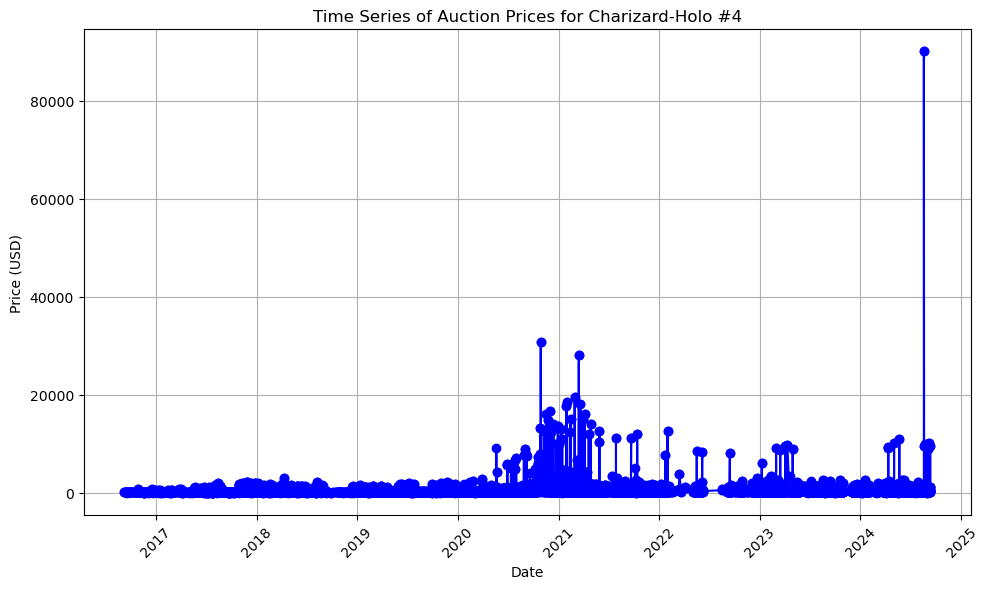

In [32]:
import matplotlib.pyplot as plt

def plot_card_timeseries(df, card_name):
    """
    Plots the time series of auction prices for a specific card.

    Args:
        df (pd.DataFrame): DataFrame containing 'card_name', 'date', and 'price' columns.
        card_name (str): The name of the card to plot.

    Returns:
        None
    """
    # Filter the DataFrame for the specified card
    card_df = df[df['card_name'] == card_name].copy()
    
    # Convert 'date' column to datetime
    card_df['date'] = pd.to_datetime(card_df['date'])
    
    # Remove non-numeric characters from 'price' and convert to float
    card_df['price'] = card_df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Sort by date
    card_df = card_df.sort_values(by='date')
    
    # Plot the time series
    plt.figure(figsize=(10, 6))
    plt.plot(card_df['date'], card_df['price'], marker='o', linestyle='-', color='b')
    plt.title(f"Time Series of Auction Prices for {card_name}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
first_card_name = "Charizard-Holo #4"  # Example: Name of the first card
plot_card_timeseries(df, first_card_name)


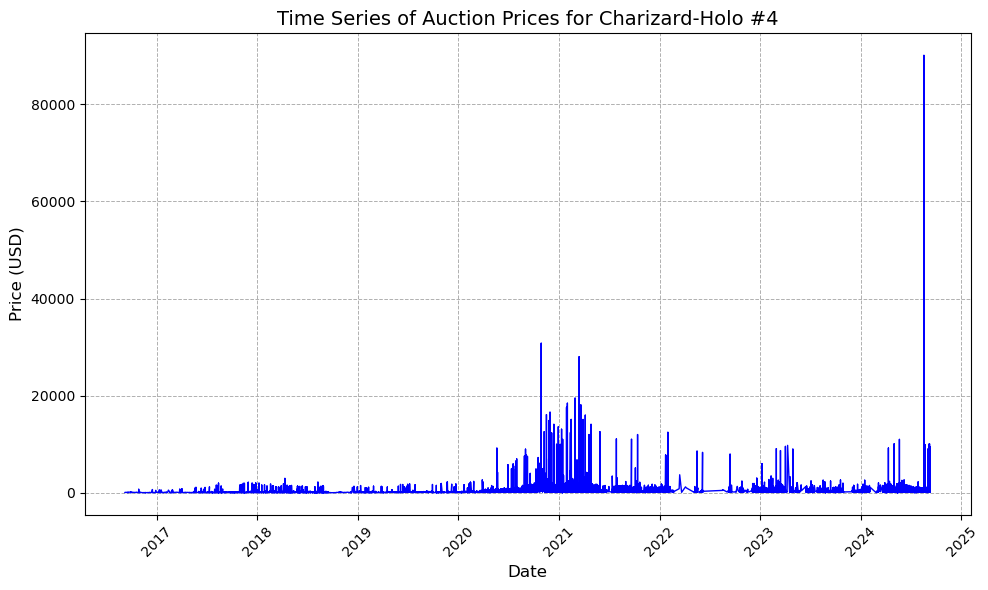

In [34]:
import matplotlib.pyplot as plt

def plot_card_timeseries(df, card_name):
    """
    Plots the time series of auction prices for a specific card with improved aesthetics.

    Args:
        df (pd.DataFrame): DataFrame containing 'card_name', 'date', and 'price' columns.
        card_name (str): The name of the card to plot.

    Returns:
        None
    """
    # Filter the DataFrame for the specified card
    card_df = df[df['card_name'] == card_name].copy()
    
    # Convert 'date' column to datetime
    card_df['date'] = pd.to_datetime(card_df['date'])
    
    # Remove non-numeric characters from 'price' and convert to float
    card_df['price'] = card_df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Sort by date
    card_df = card_df.sort_values(by='date')
    
    # Plot the time series with improved aesthetics
    plt.figure(figsize=(10, 6))
    plt.plot(card_df['date'], card_df['price'], linestyle='-', color='blue', linewidth=1)
    plt.title(f"Time Series of Auction Prices for {card_name}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    
    # Use a thinner line and remove the markers to make it more like a smooth time series
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
first_card_name = "Charizard-Holo #4"  # Example: Name of the first card
plot_card_timeseries(df, first_card_name)


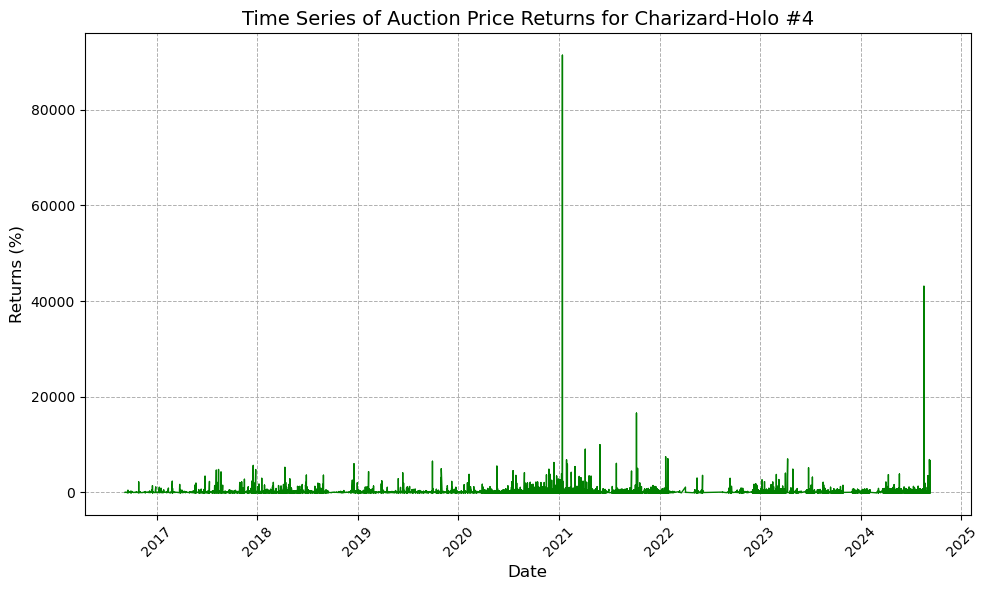

In [36]:
import matplotlib.pyplot as plt

def plot_card_returns(df, card_name):
    """
    Plots the time series of auction price returns for a specific card.

    Args:
        df (pd.DataFrame): DataFrame containing 'card_name', 'date', and 'price' columns.
        card_name (str): The name of the card to plot.

    Returns:
        None
    """
    # Filter the DataFrame for the specified card
    card_df = df[df['card_name'] == card_name].copy()
    
    # Convert 'date' column to datetime
    card_df['date'] = pd.to_datetime(card_df['date'])
    
    # Remove non-numeric characters from 'price' and convert to float
    card_df['price'] = card_df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Sort by date
    card_df = card_df.sort_values(by='date')
    
    # Calculate percentage returns (daily returns or based on time index)
    card_df['returns'] = card_df['price'].pct_change() * 100
    
    # Drop any rows with missing returns
    card_df = card_df.dropna(subset=['returns'])
    
    # Plot the returns
    plt.figure(figsize=(10, 6))
    plt.plot(card_df['date'], card_df['returns'], linestyle='-', color='green', linewidth=1)
    plt.title(f"Time Series of Auction Price Returns for {card_name}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Returns (%)", fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    
    # Use a thinner line and remove markers for a smooth time series
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
first_card_name = "Charizard-Holo #4"  # Example: Name of the first card
plot_card_returns(df, first_card_name)


In [38]:
def calculate_return_statistics(df, card_name):
    """
    Calculates the mean, minimum, and maximum of auction price returns for a specific card.
    """
    # Filter the DataFrame for the specified card
    card_df = df[df['card_name'] == card_name].copy()
    
    # Convert 'date' column to datetime
    card_df['date'] = pd.to_datetime(card_df['date'])
    
    # Remove non-numeric characters from 'price' and convert to float
    card_df['price'] = card_df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Sort by date
    card_df = card_df.sort_values(by='date')
    
    # Remove zero or negative prices
    card_df = card_df[card_df['price'] > 0]
    
    # Calculate percentage returns
    card_df['returns'] = card_df['price'].pct_change() * 100
    
    # Drop any rows with missing returns
    card_df = card_df.dropna(subset=['returns'])
    
    # Check for empty DataFrame after cleaning
    if card_df.empty:
        print(f"No valid data for {card_name} to calculate returns.")
        return {
            'mean_return': None,
            'min_return': None,
            'max_return': None
        }
    
    # Calculate statistics
    mean_return = card_df['returns'].mean()
    min_return = card_df['returns'].min()
    max_return = card_df['returns'].max()
    
    # Return statistics in a dictionary
    return {
        'mean_return': mean_return,
        'min_return': min_return,
        'max_return': max_return
    }

# Example usage
first_card_name = "Charizard-Holo #4"  # Example: Name of the first card
stats = calculate_return_statistics(df, first_card_name)

if stats['mean_return'] is not None:
    print(f"Mean Return: {stats['mean_return']:.2f}%")
    print(f"Min Return: {stats['min_return']:.2f}%")
    print(f"Max Return: {stats['max_return']:.2f}%")



Mean Return: 85.94%
Min Return: -99.87%
Max Return: 91400.00%


In [39]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_random_walk(df, card_name):
    """
    Tests if the price series for a specific card follows a random walk using the ADF test.

    Args:
        df (pd.DataFrame): DataFrame containing 'card_name', 'date', and 'price' columns.
        card_name (str): The name of the card to test.

    Returns:
        dict: A dictionary containing ADF statistic and p-value.
    """
    # Filter the DataFrame for the specified card
    card_df = df[df['card_name'] == card_name].copy()
    
    # Convert 'date' column to datetime
    card_df['date'] = pd.to_datetime(card_df['date'])
    
    # Remove non-numeric characters from 'price' and convert to float
    card_df['price'] = card_df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Sort by date
    card_df = card_df.sort_values(by='date')
    
    # Remove zero or negative prices
    card_df = card_df[card_df['price'] > 0]
    
    # Calculate returns
    card_df['returns'] = card_df['price'].pct_change().dropna()
    
    # Drop NaN values
    returns = card_df['returns'].dropna()

    # Perform ADF test
    adf_statistic, p_value, _, _, critical_values, _ = adfuller(returns)

    return {
        'adf_statistic': adf_statistic,
        'p_value': p_value,
        'critical_values': critical_values
    }

# Example usage
first_card_name = "Charizard-Holo #4"  # Example: Name of the first card
random_walk_results = test_random_walk(df, first_card_name)

print(f"ADF Statistic: {random_walk_results['adf_statistic']:.4f}")
print(f"P-Value: {random_walk_results['p_value']:.4f}")
print("Critical Values:")
for key, value in random_walk_results['critical_values'].items():
    print(f"  {key}: {value:.4f}")


ADF Statistic: -54.2629
P-Value: 0.0000
Critical Values:
  1%: -3.4307
  5%: -2.8617
  10%: -2.5668


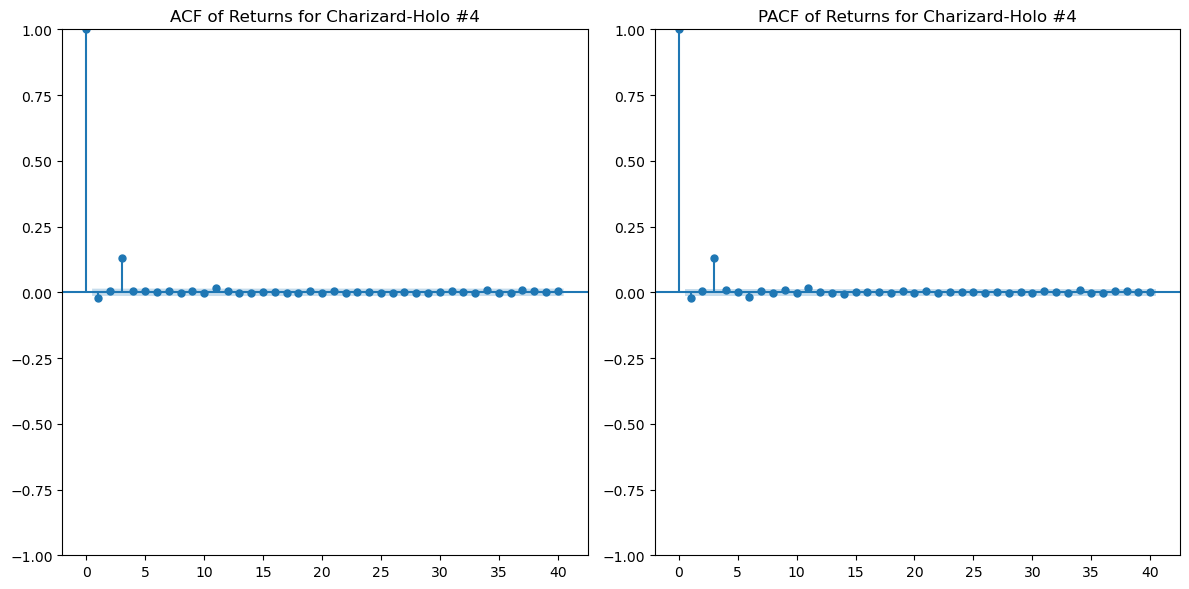

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(df, card_name):
    """
    Plots the ACF and PACF for auction price returns of a specific card.

    Args:
        df (pd.DataFrame): DataFrame containing 'card_name', 'date', and 'price' columns.
        card_name (str): The name of the card to plot.

    Returns:
        None
    """
    # Filter the DataFrame for the specified card
    card_df = df[df['card_name'] == card_name].copy()
    
    # Convert 'date' column to datetime
    card_df['date'] = pd.to_datetime(card_df['date'])
    
    # Remove non-numeric characters from 'price' and convert to float
    card_df['price'] = card_df['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Sort by date
    card_df = card_df.sort_values(by='date')
    
    # Remove zero or negative prices
    card_df = card_df[card_df['price'] > 0]
    
    # Calculate returns
    card_df['returns'] = card_df['price'].pct_change().dropna()
    
    # Drop NaN values
    returns = card_df['returns'].dropna()

    # Create ACF and PACF plots
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plot_acf(returns, lags=40, ax=plt.gca())
    plt.title(f'ACF of Returns for {card_name}')

    plt.subplot(1, 2, 2)
    plot_pacf(returns, lags=40, ax=plt.gca())
    plt.title(f'PACF of Returns for {card_name}')

    plt.tight_layout()
    plt.show()

# Example usage
first_card_name = "Charizard-Holo #4"  # Example: Name of the first card
plot_acf_pacf(df, first_card_name)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual data)
# df = pd.DataFrame({
#     'card_name': [...],
#     'date': [...],
#     'price': [...]
# })

# Assuming you already have the returns calculated
# df['returns'] = df['price'].pct_change() * 100

# Filter the returns for the specific card
card_name = "Charizard-Holo #4"  # Replace with your card name
returns = df[df['card_name'] == card_name]['returns'].dropna()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot histogram and density
sns.histplot(returns, bins=30, kde=True, color='lightblue', stat='density', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title(f"Distribution of Returns for {card_name}", fontsize=16)
plt.xlabel("Returns (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'df' is not defined

### SAVE THE DATA AND continue in R

In [2]:
# Load necessary libraries

install.packages('ggplot2')
library(ggplot2)
library(forecast)

# Sample Data Frame (replace with your data)
# df <- data.frame(card_name = ..., date = ..., price = ...)

# Assuming you have a column for returns in your data frame
# Calculate returns (if not already calculated)
# df$returns <- c(NA, diff(df$price) / head(df$price, -1)

# Filter the returns for the specific card
card_name <- "Charizard-Holo #4"  # Replace with your card name
returns <- df[df$card_name == card_name, "returns"]

# Remove NA values
returns <- na.omit(returns)

# Plot ACF
par(mfrow=c(1, 2))  # Set up the plotting area to show both plots
Acf(returns, main = paste("ACF of Returns for", card_name), ci.col = "blue")

# Plot PACF
Pacf(returns, main = paste("PACF of Returns for", card_name), ci.col = "blue")

# Reset plotting area
par(mfrow=c(1, 1))


# TCG PLAYER CONT:

In [3]:
import os
import json
from bs4 import BeautifulSoup

def extract_links_from_htmls(input_folder='tcg_price_guide_htmls', output_folder='tcg_price_guide_links'):
    """
    Extracts card links from HTML files in a folder, prefixes them with 'https://www.tcgplayer.com',
    and saves them as JSON files.

    Args:
        input_folder (str): Path to the folder containing the HTML files (default: 'tcg_price_guide_htmls').
        output_folder (str): Path to the folder where JSON files with extracted links will be saved.
                             (default: 'tcg_price_guide_links').

    Each HTML file in the input_folder is assumed to represent a Pokémon set, and each set will have multiple card links.
    The extracted links are prefixed with 'https://www.tcgplayer.com' and saved in individual JSON files, 
    one per Pokémon set, named similarly to the input HTML files.
    """
    
    # Prefix for the links
    url_prefix = 'https://www.tcgplayer.com'
    
    # Ensure the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each HTML file in the input folder
    for html_file in os.listdir(input_folder):
        if html_file.endswith(".html"):
            input_file_path = os.path.join(input_folder, html_file)

            # Open and read the HTML file
            with open(input_file_path, 'r', encoding='utf-8') as file:
                html_content = file.read()
            
            # Parse the HTML using BeautifulSoup
            soup = BeautifulSoup(html_content, 'html.parser')
            
            # Find all <a> tags with the 'pdp-url' class (which contains the links)
            links = []
            for link_tag in soup.find_all('a', class_='pdp-url'):
                link_href = link_tag.get('href')
                if link_href:  # Make sure the href attribute exists
                    # Prefix the extracted link with 'https://www.tcgplayer.com'
                    full_link = url_prefix + link_href
                    links.append(full_link)
            
            # Create a dictionary to store the links for this Pokémon set
            pokemon_set_links = {
                "set_name": html_file.replace(".html", ""),
                "links": links
            }
            
            # Define the output JSON file name based on the input HTML file name
            output_file_name = html_file.replace(".html", ".json")
            output_file_path = os.path.join(output_folder, output_file_name)
            
            # Write the extracted and prefixed links to the JSON file
            with open(output_file_path, 'w', encoding='utf-8') as json_file:
                json.dump(pokemon_set_links, json_file, ensure_ascii=False, indent=4)
    
    print(f"Extraction complete. JSON files saved in {output_folder}")


extract_links_from_htmls()


Extraction complete. JSON files saved in tcg_price_guide_links


In [4]:
import json
from bs4 import BeautifulSoup

def extract_card_data_from_html(html_file, output_json):
    try:
        # Load the HTML content from the file
        with open(html_file, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML content with BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Initialize a list to store card data
        cards_data = []

        # Find all rows with card data (class could be 'is-odd' or 'is-even')
        rows = soup.find_all('tr', class_=['is-odd', 'is-even'])

        # Loop through each row and extract data
        for row in rows:
            # Get the card image, name, and link
            card_image_tag = row.find('img', class_='thumbnail')
            image_link = card_image_tag['src'] if card_image_tag else 'N/A'

            card_name_tag = row.find('a', class_='pdp-url')
            card_name = card_name_tag.text.strip() if card_name_tag else 'N/A'
            card_link = card_name_tag['href'] if card_name_tag else 'N/A'

            # Get the printing type (e.g., Holofoil)
            printing_tag = row.find('span', class_='printing-single')
            printing = printing_tag.text.strip() if printing_tag else 'N/A'

            # Get the card condition (e.g., Heavily Played)
            condition_tag = row.find('span', class_='condition-single')
            condition = condition_tag.text.strip() if condition_tag else 'N/A'

            # Get the rarity from the 5th column (index 4)
            rarity_tag = row.find_all('td')[5]
            rarity = rarity_tag.text.strip() if rarity_tag else 'N/A'

            # Get the card number from the 6th column (index 5)
            card_number_tag = row.find_all('td')[6]
            card_number = card_number_tag.text.strip() if card_number_tag else 'N/A'

            # Get the price from the 7th column (index 6)
            price_tag = row.find_all('td')[7]
            price = price_tag.text.strip() if price_tag else 'N/A'

            # Create a dictionary for this card's data
            card_data = {
                'card_name': card_name,
                'card_link': card_link,
                'image_link': image_link,
                'printing': printing,
                'condition': condition,
                'rarity': rarity,
                'card_number': card_number,
                'price': price
            }

            # Add the card data to the list
            cards_data.append(card_data)

        # Save the extracted data to a JSON file
        with open(output_json, 'w', encoding='utf-8') as json_file:
            json.dump(cards_data, json_file, ensure_ascii=False, indent=4)

        print(f"Data extracted and saved to {output_json}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
extract_card_data_from_html('tcg_price_guide_htmls_full/aquapolis.html', 'tcg_price_guide_htmls_full/aquapolis.json')


Data extracted and saved to tcg_price_guide_htmls_full/aquapolis.json


In [5]:
import json
import os
from bs4 import BeautifulSoup

def extract_card_data_from_html(html_file, output_json):
    try:
        # Load the HTML content from the file
        with open(html_file, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML content with BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Initialize a list to store card data
        cards_data = []

        # Find all rows with card data (class could be 'is-odd' or 'is-even')
        rows = soup.find_all('tr', class_=['is-odd', 'is-even'])

        # Loop through each row and extract data
        for row in rows:
            # Get the card image, name, and link
            card_image_tag = row.find('img', class_='thumbnail')
            image_link = card_image_tag['src'] if card_image_tag else 'N/A'

            card_name_tag = row.find('a', class_='pdp-url')
            card_name = card_name_tag.text.strip() if card_name_tag else 'N/A'
            card_link = card_name_tag['href'] if card_name_tag else 'N/A'

            # Get the printing type (e.g., Holofoil)
            printing_tag = row.find('span', class_='printing-single')
            printing = printing_tag.text.strip() if printing_tag else 'N/A'

            # Get the card condition (e.g., Heavily Played)
            condition_tag = row.find('span', class_='condition-single')
            condition = condition_tag.text.strip() if condition_tag else 'N/A'

            # Get the rarity from the 5th column (index 5)
            rarity_tag = row.find_all('td')[5]
            rarity = rarity_tag.text.strip() if rarity_tag else 'N/A'

            # Get the card number from the 6th column (index 6)
            card_number_tag = row.find_all('td')[6]
            card_number = card_number_tag.text.strip() if card_number_tag else 'N/A'

            # Get the price from the 7th column (index 7)
            price_tag = row.find_all('td')[7]
            price = price_tag.text.strip() if price_tag else 'N/A'

            # Create a dictionary for this card's data
            card_data = {
                'card_name': card_name,
                'card_link': card_link,
                'image_link': image_link,
                'printing': printing,
                'condition': condition,
                'rarity': rarity,
                'card_number': card_number,
                'price': price
            }

            # Add the card data to the list
            cards_data.append(card_data)

        # Save the extracted data to a JSON file
        with open(output_json, 'w', encoding='utf-8') as json_file:
            json.dump(cards_data, json_file, ensure_ascii=False, indent=4)

        print(f"Data extracted and saved to {output_json}")

    except Exception as e:
        print(f"An error occurred: {e}")

def process_all_html_in_folder(folder_path):
    # Loop through all HTML files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.html'):
            html_file_path = os.path.join(folder_path, filename)
            json_file_path = os.path.join(folder_path, filename.replace('.html', '.json'))
            
            # Extract card data and save it to the corresponding JSON file
            extract_card_data_from_html(html_file_path, json_file_path)

# Example usage:
process_all_html_in_folder('tcg_price_guide_htmls_full')


Data extracted and saved to tcg_price_guide_htmls_full\aquapolis.json
Data extracted and saved to tcg_price_guide_htmls_full\arceus.json
Data extracted and saved to tcg_price_guide_htmls_full\base-set-2.json
Data extracted and saved to tcg_price_guide_htmls_full\base-set-shadowless.json
Data extracted and saved to tcg_price_guide_htmls_full\base-set.json
Data extracted and saved to tcg_price_guide_htmls_full\battle-academy-2022.json
Data extracted and saved to tcg_price_guide_htmls_full\battle-academy-2024.json
Data extracted and saved to tcg_price_guide_htmls_full\battle-academy.json
Data extracted and saved to tcg_price_guide_htmls_full\best-of-promos.json
Data extracted and saved to tcg_price_guide_htmls_full\black-and-white-promos.json
Data extracted and saved to tcg_price_guide_htmls_full\black-and-white.json
Data extracted and saved to tcg_price_guide_htmls_full\blister-exclusives.json
Data extracted and saved to tcg_price_guide_htmls_full\boundaries-crossed.json
Data extracted a

In [6]:
import os
from bs4 import BeautifulSoup
import json

# Function to extract sealed product data from HTML
def extract_sealed_products(html):
    soup = BeautifulSoup(html, 'html.parser')
    products = []
    
    # Locate the table rows for the products
    rows = soup.select('tbody.tcg-table-body > tr')
    
    for row in rows:
        product_data = {}
        
        # Get the product image
        image_tag = row.select_one('td.tcg-table-body__sticky-col img.thumbnail')
        if image_tag:
            product_data['image_url'] = image_tag['src']
        
        # Get the product name and its link
        name_tag = row.select_one('td.tcg-table-body__cell a.pdp-url')
        if name_tag:
            product_data['product_name'] = name_tag.text.strip()
            product_data['product_link'] = "https://tcgplayer.com" + name_tag['href']
        
        # Get the market price
        price_tag = row.select_one('td.tcg-table-body__cell--align-right')
        if price_tag:
            product_data['market_price'] = price_tag.text.strip()
        
        # Get Add to Cart or Quantity info
        quantity_tag = row.select_one('div.tcg-input-select__trigger')
        if quantity_tag:
            product_data['quantity'] = quantity_tag.text.strip()
        
        # Append product data to the list
        products.append(product_data)
    
    return products

# Function to loop through all HTML files in the folder and save extracted data as JSON
def process_sealed_html_files(folder_path):
    # Iterate through all HTML files in the specified folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.html'):
            file_path = os.path.join(folder_path, filename)
            
            # Read the HTML content from the file
            with open(file_path, 'r', encoding='utf-8') as file:
                html_content = file.read()
            
            # Extract the sealed product data
            sealed_products = extract_sealed_products(html_content)
            
            # Define the output JSON file path
            json_filename = filename.replace('.html', '.json')
            json_file_path = os.path.join(folder_path, json_filename)
            
            # Save the data as JSON
            with open(json_file_path, 'w', encoding='utf-8') as json_file:
                json.dump(sealed_products, json_file, indent=4)
            
            print(f"Extracted and saved data from {filename} to {json_filename}")

# Specify the folder containing the sealed product HTML files
sealed_html_folder = 'tcg_price_guide_sealed_htmls_full'

# Process the sealed product HTML files and save data as JSONs
process_sealed_html_files(sealed_html_folder)


Extracted and saved data from base-set-2_sealed.html to base-set-2_sealed.json
Extracted and saved data from base-set_sealed.html to base-set_sealed.json
Extracted and saved data from battle-academy-2022_sealed.html to battle-academy-2022_sealed.json
Extracted and saved data from battle-academy-2024_sealed.html to battle-academy-2024_sealed.json
Extracted and saved data from battle-academy_sealed.html to battle-academy_sealed.json
Extracted and saved data from black-and-white_sealed.html to black-and-white_sealed.json
Extracted and saved data from celebrations_sealed.html to celebrations_sealed.json
Extracted and saved data from champions-path_sealed.html to champions-path_sealed.json
Extracted and saved data from crown-zenith_sealed.html to crown-zenith_sealed.json
Extracted and saved data from dark-explorers_sealed.html to dark-explorers_sealed.json
Extracted and saved data from delta-species_sealed.html to delta-species_sealed.json
Extracted and saved data from deoxys_sealed.html to

In [1]:
# save the cards data as excel:

import os
import json
import pandas as pd

def json_to_excel(json_folder, output_excel):
    """
    Loops through all JSON files in a folder, extracts card data, and saves it into one Excel file.

    Parameters:
    json_folder (str): Path to the folder containing JSON files of Pokémon sets.
    output_excel (str): Path to the output Excel file (including the file name and .xlsx extension).

    Returns:
    None
    """
    # List to hold all card data across sets
    all_card_data = []

    # Loop through all files in the provided folder
    for filename in os.listdir(json_folder):
        if filename.endswith('.json'):
            json_path = os.path.join(json_folder, filename)
            
            # Open and load the JSON file
            with open(json_path, 'r') as file:
                card_data = json.load(file)
                
                # Extract set name (file name without .json extension)
                set_name = filename.replace('.json', '')

                # Add the set name to each card entry
                for card in card_data:
                    card['set_name'] = set_name

                # Append the card data from this set to the main list
                all_card_data.extend(card_data)

    # Convert the list of card data to a pandas DataFrame
    df = pd.DataFrame(all_card_data)

    # Save the DataFrame to an Excel file
    df.to_excel(output_excel, index=False)

    print(f"Data successfully saved to {output_excel}")

# Example usage:
json_folder = 'tcg_price_guide_htmls_full'
output_excel = 'TCG_cards_data.xlsx'
json_to_excel(json_folder, output_excel)




### THERE IS A MISTAKE! THE INITIAL FUNCTION SCRAPING THE LINKS TO ALL THE PRICE GUIDES DID NOT GET ALL THE SETS FOR SOME REASON...

#  SO LETS TRY AGAIN:

Data successfully saved to TCG_cards_data.xlsx


## REALISED THERE ARE NOT ALL SETS WE NEED (particularly all sun&moon sets except cosmic eclipse)..
### THUS REPEATING THE FULL PROCESS FOR TCG PLAYER AGAIN:

In [2]:
# THE FOLLOWING FUNCTION NOT WORKING (SELENIUM NOT WORKING ANYMORE), SO WE USE PUPETEER SCRIPT NAMED: SCRAPE_tcgplayer_FOR_SET_LINKS.js


from functions import scrape_tcgplayer

scrape_tcgplayer('https://www.tcgplayer.com/categories/trading-and-collectible-card-games/pokemon', 'tcg_player_all_sets_FINAL.html')


## now we have a consolidated html of the sets... i.e. html of the set list -> from that we get the links to the sets -> links to cards -> prices

OSError: [WinError 193] %1 není platná aplikace typu Win32

#### THE ABOVE FUNCTION NOT WORKING (SELENIUM NOT WORKING ANYMORE), SO WE USE PUPETEER SCRIPT NAMED: SCRAPE_tcgplayer_FOR_SET_LINKS.js

In [4]:
#get links to sets - and get the prices directly from that:

from functions import extract_links_from_html_tcg

extract_links_from_html_tcg('tcg_player_all_sets_FINAL.html', 'links_tcgp_sets_FINAL.json')



Extracted 144 links and saved to links_tcgp_sets_FINAL.json


#### Following we merge the old list of set links (links_tcgp_sets.json) with the new one (links_tcgp_sets_FINAL.json) (134 links in the old one 144 in the new one, some not working... new list has about 180 links):

In [5]:
import json
import re

def clean_and_merge_links(new_links_file: str, old_links_file: str, output_file: str):
    """
    Cleans and merges two JSON files containing lists of links.
    
    1. Loads the JSON files with the lists of links.
    2. Removes links that contain the word 'inactive', along with unwanted characters
       (e.g., numbers, percentages, or other symbols) around 'inactive'.
    3. Merges the cleaned new list with an older list of links.
    4. Removes duplicate links after the merge.
    5. Saves the cleaned, merged list into a new JSON file.
    
    Args:
        new_links_file (str): Path to the JSON file with the new list of links.
        old_links_file (str): Path to the JSON file with the old list of links.
        output_file (str): Path to save the cleaned and merged JSON file.
    
    Returns:
        None
    """
    
    # Helper function to clean links containing 'inactive'
    def remove_inactive_links(links):
        cleaned_links = []
        for link in links:
            # Remove links with 'inactive' and surrounding symbols
            if not re.search(r'inactive[\w\W]*', link):
                cleaned_links.append(link)
        return cleaned_links
    
    # Load the new and old JSON files
    with open(new_links_file, 'r') as f:
        new_links = json.load(f)
    
    with open(old_links_file, 'r') as f:
        old_links = json.load(f)
    
    # Clean the new links by removing the 'inactive' links
    cleaned_new_links = remove_inactive_links(new_links)
    
    # Merge the cleaned new links with the old links
    merged_links = cleaned_new_links + old_links
    
    # Remove duplicates by converting to a set and then back to a list
    unique_links = list(set(merged_links))
    
    # Save the cleaned, merged list to a new JSON file
    with open(output_file, 'w') as f:
        json.dump(unique_links, f, indent=4)
    
    print(f"Cleaned and merged list saved to {output_file}")



clean_and_merge_links('links_tcgp_sets_FINAL.json', 'links_tcgp_sets.json', 'links_tcgp_sets_cleaned_merged_FINAL.json')


Cleaned and merged list saved to links_tcgp_sets_cleaned_merged_FINAL.json


### Here (at this point) we use the function TCG_PRICEGUIDE_SETS_SCRAPER.js to scrape the links

#### apparently the Unbroken Bonds set was not scraped for some reason, thus we create and use new function (scraping just a single link): TCG_PRICEGUIDE_ONE_SET_SCRAPER.js

In [7]:
# this function should extract the data from the htmls:


import json
import os
from bs4 import BeautifulSoup

def extract_card_data_from_html(html_file, output_json):
    try:
        # Load the HTML content from the file
        with open(html_file, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML content with BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Initialize a list to store card data
        cards_data = []

        # Find all rows with card data (class could be 'is-odd' or 'is-even')
        rows = soup.find_all('tr', class_=['is-odd', 'is-even'])

        # Loop through each row and extract data
        for row in rows:
            # Get the card image, name, and link
            card_image_tag = row.find('img', class_='thumbnail')
            image_link = card_image_tag['src'] if card_image_tag else 'N/A'

            card_name_tag = row.find('a', class_='pdp-url')
            card_name = card_name_tag.text.strip() if card_name_tag else 'N/A'
            card_link = card_name_tag['href'] if card_name_tag else 'N/A'

            # Get the printing type (e.g., Holofoil)
            printing_tag = row.find('span', class_='printing-single')
            printing = printing_tag.text.strip() if printing_tag else 'N/A'

            # Get the card condition (e.g., Heavily Played)
            condition_tag = row.find('span', class_='condition-single')
            condition = condition_tag.text.strip() if condition_tag else 'N/A'

            # Get the rarity from the 5th column (index 5)
            rarity_tag = row.find_all('td')[5]
            rarity = rarity_tag.text.strip() if rarity_tag else 'N/A'

            # Get the card number from the 6th column (index 6)
            card_number_tag = row.find_all('td')[6]
            card_number = card_number_tag.text.strip() if card_number_tag else 'N/A'

            # Get the price from the 7th column (index 7)
            price_tag = row.find_all('td')[7]
            price = price_tag.text.strip() if price_tag else 'N/A'

            # Create a dictionary for this card's data
            card_data = {
                'card_name': card_name,
                'card_link': card_link,
                'image_link': image_link,
                'printing': printing,
                'condition': condition,
                'rarity': rarity,
                'card_number': card_number,
                'price': price
            }

            # Add the card data to the list
            cards_data.append(card_data)

        # Save the extracted data to a JSON file
        with open(output_json, 'w', encoding='utf-8') as json_file:
            json.dump(cards_data, json_file, ensure_ascii=False, indent=4)

        print(f"Data extracted and saved to {output_json}")

    except Exception as e:
        print(f"An error occurred: {e}")

def process_all_html_in_folder(folder_path):
    # Loop through all HTML files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.html'):
            html_file_path = os.path.join(folder_path, filename)
            json_file_path = os.path.join(folder_path, filename.replace('.html', '.json'))
            
            # Extract card data and save it to the corresponding JSON file
            extract_card_data_from_html(html_file_path, json_file_path)

# Example usage:
process_all_html_in_folder('TCG_PRICE_GUIDES_CARDS_FINAL')


Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\alternate-art-promos.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\arceus.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\ash-vs-team-rocket-deck-kit-jp-exclusive.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\base-set-2.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\base-set-shadowless.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\base-set.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\battle-academy-2022.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\battle-academy-2024.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\battle-academy.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\best-of-promos.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\black-and-white-promos.json
Data extracted and saved to TCG_PRICE_GUIDES_CARDS_FINAL\black-and-white.json
Data extracted and saved to TCG_PRICE_